In [1]:
# Importamos las librerías
%matplotlib inline
#importamos pandas
import pandas as pd
#importamos numpy
import numpy as np
#importamos Expresiones Regulares
import re
#importamos Plotly express
import plotly.express as px
#importamos Plotly 
import matplotlib.pyplot as plt
#importamos Seaborn
import seaborn as sns
#importamos ip widget
from ipywidgets import interact_manual
#importamos modelos lineales
from sklearn import linear_model
#importamos modelos R2score
from sklearn.metrics import r2_score
#importamos train_test_split
from sklearn.model_selection import train_test_split
#importamos metrics
from sklearn import metrics
#importamos herramientas de normalizacion
from sklearn import preprocessing


In [2]:
#importacion base de datos#
df = pd.read_csv("../Data/properati_train.csv", sep=",")

#print tipo de datos
print(df.dtypes)

#ejemplo primeros tres
df.head(3)

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
counter     

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,pileta,gym,parrilla,cochera,jardin,new_rooms,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,place_name_clean
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,NO,NO,NO,NO,NO,2.0,2.0,55.0,1127.272727,Mataderos
1,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,NO,NO,NO,NO,NO,2.0,2.0,55.0,1309.090909,Mataderos
2,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,NO,NO,NO,NO,NO,NaN,0.0,35.0,1828.571429,Mar del Plata Centro


In [3]:
#Simplificamos los amenities de parrilla, gimnasio y jardin en una unica columna de tiene o no tiene amenities
df["amenities"] = df["parrilla"]  
amenities_1 = df["pileta"] =="SI"
df.loc[amenities_1, "amenities"] = "SI"
amenities_2 = df["gym"] =="SI"
df.loc[amenities_2, "amenities"] = "SI"
amenities_3 = df["jardin"] =="SI"
df.loc[amenities_3, "amenities"] = "SI"

df

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,gym,parrilla,cochera,jardin,new_rooms,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,place_name_clean,amenities
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,NO,NO,NO,NO,2.0,2.0,55.0,1127.272727,Mataderos,NO
1,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,NO,NO,NO,NO,2.0,2.0,55.0,1309.090909,Mataderos,NO
2,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,NO,NO,NO,NO,NaN,0.0,35.0,1828.571429,Mar del Plata Centro,NO
3,6,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",-34.532957,...,NO,NO,NO,NO,NaN,0.0,106.0,1226.415094,Munro,NO
4,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,NO,NO,NO,NO,1.0,1.0,45.0,3066.666667,Belgrano,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92708,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,NO,SI,SI,NO,NaN,0.0,113.0,7699.115044,Belgrano,SI
92709,121216,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436080.0,NaN,NaN,...,NO,SI,SI,SI,NaN,0.0,360.0,1383.333333,Beccar,SI
92710,121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,...,NO,SI,NO,NO,1.0,1.0,46.0,2858.695652,Villa Urquiza,SI
92711,121218,sell,apartment,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,NaN,NaN,NaN,...,NO,NO,NO,NO,2.0,2.0,48.0,1997.916667,Mar del Plata Plaza Colón,NO


In [98]:
#superficie cubierta nulo
data_suptotal_nulos_mask = df["surface_covered_in_m2"].isnull()
df.loc[data_suptotal_nulos_mask, "surface_covered_in_m2"] = df['surface_total_in_m2_clean']



In [99]:
df[data_suptotal_nulos_mask]


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,gym,parrilla,cochera,jardin,new_rooms,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,place_name_clean,amenities


In [100]:
#filtro por region y drop del state_name
df_pais = df.drop(["state_name"], axis=1)
#query de provincias que no son buenos aires y caba
df_provincias = df.query(' state_name != "Capital Federal" & state_name != "Bs.As. G.B.A. Zona Sur" & state_name != "Buenos Aires Costa Atlántica" & state_name != "Bs.As. G.B.A. Zona Norte" & state_name != "Bs.As. G.B.A. Zona Oeste" & state_name != "Buenos Aires Interior"')
df_provincias = df.drop(["state_name"], axis=1)
#query de provincias que son buenos aires y caba
df_baires = df.query(' state_name == "Capital Federal" | state_name == "Bs.As. G.B.A. Zona Sur" | state_name == "Buenos Aires Costa Atlántica" | state_name == "Bs.As. G.B.A. Zona Norte" | state_name == "Bs.As. G.B.A. Zona Oeste" | state_name == "Buenos Aires Interior"')
df_baires = df_baires.drop(["state_name"], axis=1)
#query de caba
df_caba = df.query(' state_name == "Capital Federal"')
df_caba = df_caba.drop(["state_name"], axis=1)
#query de BsAs Sur
df_bsas_sur = df.query(' state_name == "Bs.As. G.B.A. Zona Sur"')
df_bsas_sur = df_bsas_sur.drop(["state_name"], axis=1)
#query de BsAs Costa
df_bsas_costa = df.query(' state_name == "Buenos Aires Costa Atlántica"')
df_bsas_costa = df_bsas_costa.drop(["state_name"], axis=1)
#query de BsAs Norte
df_bsas_norte = df.query(' state_name == "Bs.As. G.B.A. Zona Norte"')
df_bsas_norte = df_bsas_norte.drop(["state_name"], axis=1)
#query de BsAs Oeste
df_bsas_oeste = df.query(' state_name == "Bs.As. G.B.A. Zona Oeste"')
df_bsas_oeste = df_bsas_oeste.drop(["state_name"], axis=1)
#query de BsAs Interior
df_bsas_interior = df.query(' state_name == "Buenos Aires Interior"')
df_bsas_interior = df_bsas_interior.drop(["state_name"], axis=1)
#df_pais.to_csv("../Data/properati_train_prueba_pais.csv", index=False)

df_caba

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,...,gym,parrilla,cochera,jardin,new_rooms,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,place_name_clean,amenities
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,NO,NO,NO,NO,2.0,2.0,55.0,1127.272727,Mataderos,NO
1,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,NO,NO,NO,NO,2.0,2.0,55.0,1309.090909,Mataderos,NO
4,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,NO,NO,NO,NO,1.0,1.0,45.0,3066.666667,Belgrano,NO
5,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,NO,NO,NO,NO,2.0,2.0,65.0,3000.000000,Belgrano,NO
8,13,sell,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,3430234.0,NaN,NaN,NaN,...,NO,NO,NO,NO,3.0,1.0,50.0,2234.000000,Palermo Soho,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92660,121160,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.563685346,-58.4426825896",-34.563685,-58.442683,...,NO,NO,NO,NO,NaN,0.0,157.0,2611.464968,Belgrano,NO
92707,121209,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.563685346,-58.4426825896",-34.563685,-58.442683,...,NO,NO,NO,NO,NaN,0.0,157.0,2611.464968,Belgrano,NO
92708,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,NaN,NaN,NaN,...,NO,SI,SI,NO,NaN,0.0,113.0,7699.115044,Belgrano,SI
92710,121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,...,NO,SI,NO,NO,1.0,1.0,46.0,2858.695652,Villa Urquiza,SI


Analizaremos de menor a mayor cantidad de datos, iniciando por la division que realizamos en la entrega n° 1 
# 1. CABA


In [264]:
#generamos Dummies por cada variable cualitativas
df_caba_dummies = pd.get_dummies(data=df_caba,columns=['property_type',"amenities","cochera"], drop_first=True)
#df_rooms_clean.to_csv("../Data/properati_train_prueba.csv", index=False)
df_caba_dummies

,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,new_rooms,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI
0,0,sell,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,...,2.0,2.0,55.0,1127.272727,Mataderos,0,0,0,0,0
1,2,sell,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,...,2.0,2.0,55.0,1309.090909,Mataderos,1,0,0,0,0
4,7,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,...,1.0,1.0,45.0,3066.666667,Belgrano,1,0,0,0,0
5,8,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,195000.0,...,2.0,2.0,65.0,3000.000000,Belgrano,1,0,0,0,0
8,13,sell,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,3430234.0,NaN,NaN,NaN,111700.0,...,3.0,1.0,50.0,2234.000000,Palermo Soho,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92660,121160,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.563685346,-58.4426825896",-34.563685,-58.442683,410000.0,...,NaN,0.0,157.0,2611.464968,Belgrano,1,0,0,0,0
92707,121209,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.563685346,-58.4426825896",-34.563685,-58.442683,410000.0,...,NaN,0.0,157.0,2611.464968,Belgrano,1,0,0,0,0
92708,121215,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,NaN,NaN,NaN,870000.0,...,NaN,0.0,113.0,7699.115044,Belgrano,1,0,0,1,1
92710,121217,sell,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,131500.0,...,1.0,1.0,46.0,2858.695652,Villa Urquiza,1,0,0,1,0


<p>
   <p> 
<b> A. Identificamos una columna con los barrios mas caros

In [265]:
caba_min = df_caba_dummies["new_price_usd_per_m2_1"]<1000
caba_2400 = (df_caba_dummies["new_price_usd_per_m2_1"]>1700)  & (df_caba_dummies["new_price_usd_per_m2_1"]>2400)
caba_3100 = (df_caba_dummies["new_price_usd_per_m2_1"]>=2400)  & (df_caba_dummies["new_price_usd_per_m2_1"]>3100)
caba_3700 = (df_caba_dummies["new_price_usd_per_m2_1"]>=3100)  & (df_caba_dummies["new_price_usd_per_m2_1"]>3800)
caba_max = (df_caba_dummies["new_price_usd_per_m2_1"]>=3800)

df_caba_dummies["CABA_barrios_1"] = ""
df_caba_dummies["CABA_barrios_2"] = ""
df_caba_dummies["CABA_barrios_3"] = ""
df_caba_dummies["CABA_barrios_4"] = ""

caba_min


0        False
1        False
4        False
5        False
8        False
         ...  
92660    False
92707    False
92708    False
92710    False
92712    False
Name: new_price_usd_per_m2_1, Length: 28416, dtype: bool

In [266]:
df_caba_dummies.loc[caba_min, "CABA_barrios_1"] = 1
df_caba_dummies.loc[caba_2000, "CABA_barrios_2"] = 1
df_caba_dummies.loc[caba_3200, "CABA_barrios_3"] = 1
df_caba_dummies.loc[caba_max, "CABA_barrios_4"] = 1

df_caba_dummies["CABA_barrios_1"] = df_caba_dummies["CABA_barrios_1"].replace("",0) 
df_caba_dummies["CABA_barrios_2"] = df_caba_dummies["CABA_barrios_2"].replace("",0) 
df_caba_dummies["CABA_barrios_3"] = df_caba_dummies["CABA_barrios_3"].replace("",0) 
df_caba_dummies["CABA_barrios_4"] = df_caba_dummies["CABA_barrios_4"].replace("",0) 
df_caba_dummies

,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,CABA_barrios_1,CABA_barrios_2,CABA_barrios_3,CABA_barrios_4
0,0,sell,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,...,Mataderos,0,0,0,0,0,0,0,0,0
1,2,sell,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,...,Mataderos,1,0,0,0,0,0,0,0,0
4,7,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,...,Belgrano,1,0,0,0,0,0,1,0,0
5,8,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,195000.0,...,Belgrano,1,0,0,0,0,0,1,0,0
8,13,sell,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,3430234.0,NaN,NaN,NaN,111700.0,...,Palermo Soho,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92660,121160,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.563685346,-58.4426825896",-34.563685,-58.442683,410000.0,...,Belgrano,1,0,0,0,0,0,1,0,0
92707,121209,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.563685346,-58.4426825896",-34.563685,-58.442683,410000.0,...,Belgrano,1,0,0,0,0,0,1,0,0
92708,121215,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,NaN,NaN,NaN,870000.0,...,Belgrano,1,0,0,1,1,0,1,1,1
92710,121217,sell,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,131500.0,...,Villa Urquiza,1,0,0,1,0,0,1,0,0


In [267]:
#Creamos una variable que acumula el valor de los m2 de los barrios mas caros de CABA
#suburb_values = ['Recoleta', 'Las Cañitas', 'Puerto Madero', 'Palermo Chico', 'Palermo']
#data_suburb_mask = df_caba_dummies.place_name.apply(lambda x: x in suburb_values)
#data_suburb = df_caba_dummies.loc[data_suburb_mask, :]
#creamos una columna nueva
#data_suburb["CABA_barrios_mas_caros"] = data_suburb["new_price_usd_per_m2_1"]
#df_caba_dummies = pd.concat([df_caba_dummies,data_suburb["CABA_barrios_mas_caros"]], axis = 1)

In [268]:
#Reemplazamos los nulos de la columna por valores cero
#ambientes_131 = df_caba_dummies["CABA_barrios_mas_caros"].notnull()
#df_caba_dummies.loc[ambientes_131, "CABA_barrios_mas_caros"] = 1


In [269]:
#ambientes_134 = df_caba_dummies["CABA_barrios_mas_caros"].isnull()
#ambientes_134
#df_caba_dummies.loc[ambientes_134, "CABA_barrios_mas_caros"] = 0
#df_rooms_unique = df_caba_dummies["CABA_barrios_mas_caros"].unique()
#df_rooms_unique
#print(df_rooms_unique)

<p>
    <p>
<b>B. Barrios Mas baratos

In [270]:
#Creamos una variable que acumula el valor de los m2 de los barrios mas caros de CABA
#suburb_values = ['Mataderos', 'Parque Avellaneda', 'Pompeya', 'Villa Lugano', 'Villa Soldati']
#data_suburb_mask = df_caba_dummies.place_name.apply(lambda x: x in suburb_values)
#data_suburb = df_caba_dummies.loc[data_suburb_mask, :]
#creamos una columna nueva
#data_suburb["CABA_barrios_mas_baratos"] = data_suburb["new_price_usd_per_m2_1"]
#df_caba_dummies = pd.concat([df_caba_dummies,data_suburb["CABA_barrios_mas_baratos"]], axis = 1)

In [271]:
#Reemplazamos los nulos de la columna por valores cero
#ambientes_131 = df_caba_dummies["CABA_barrios_mas_baratos"].notnull()
#df_caba_dummies.loc[ambientes_131, "CABA_barrios_mas_baratos"] = 1


In [272]:
#ambientes_134 = df_caba_dummies["CABA_barrios_mas_baratos"].isnull()
#ambientes_134
#df_caba_dummies.loc[ambientes_134, "CABA_barrios_mas_baratos"] = 0
#df_rooms_unique = df_caba_dummies["CABA_barrios_mas_baratos"].unique()
#df_rooms_unique
#print(df_rooms_unique)

In [274]:
#regularizacion de variables no numericas dropeandolas
df_caba_dummies_drop = df_caba_dummies.drop(["pileta","parrilla","jardin","gym",'Unnamed: 0',"place_with_parent_names", 'operation', 'place_name',"country_name","geonames_id","lat-lon","lat","lon","price","currency","price_aprox_local_currency","price_aprox_usd","surface_total_in_m2","price_usd_per_m2","price_per_m2","floor", "rooms",	"expenses",	"properati_url",	"description",	"title",	"image_thumbnail",	"counter",	"nulos","new_rooms", "place_name_clean"  ], axis=1) 


In [275]:
#topes maximos y minimos, tenemos que hacer max i min cuadrados para que esto sea justificado correctamente
df_caba_dummies_drop = df_caba_dummies_drop[df_caba_dummies_drop['new_price_usd_per_m2_1'] < 8500]
df_caba_dummies_drop = df_caba_dummies_drop[df_caba_dummies_drop['new_price_usd_per_m2_1'] > 150]
#df_caba = df_caba.new_price_usd_per_m2_1
df_caba_dummies_drop

,surface_covered_in_m2,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,CABA_barrios_1,CABA_barrios_2,CABA_barrios_3,CABA_barrios_4
0,40.0,2.0,55.0,1127.272727,0,0,0,0,0,0,0,0,0
1,55.0,2.0,55.0,1309.090909,1,0,0,0,0,0,0,0,0
4,40.0,1.0,45.0,3066.666667,1,0,0,0,0,0,1,0,0
5,60.0,2.0,65.0,3000.000000,1,0,0,0,0,0,1,0,0
8,30.0,1.0,50.0,2234.000000,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92660,157.0,0.0,157.0,2611.464968,1,0,0,0,0,0,1,0,0
92707,157.0,0.0,157.0,2611.464968,1,0,0,0,0,0,1,0,0
92708,93.0,0.0,113.0,7699.115044,1,0,0,1,1,0,1,1,1
92710,39.0,1.0,46.0,2858.695652,1,0,0,1,0,0,1,0,0


Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'geonames_id', 'lat-lon',
       'lat', 'lon', 'price', 'currency', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'floor', 'rooms', 'expenses',
       'properati_url', 'description', 'title', 'image_thumbnail', 'counter',
       'nulos', 'pileta', 'gym', 'parrilla', 'cochera', 'jardin', 'new_rooms',
       'new_rooms_clean', 'surface_total_in_m2_clean',
       'new_price_usd_per_m2_1', 'place_name_clean', 'amenities'],
      dtype='object')


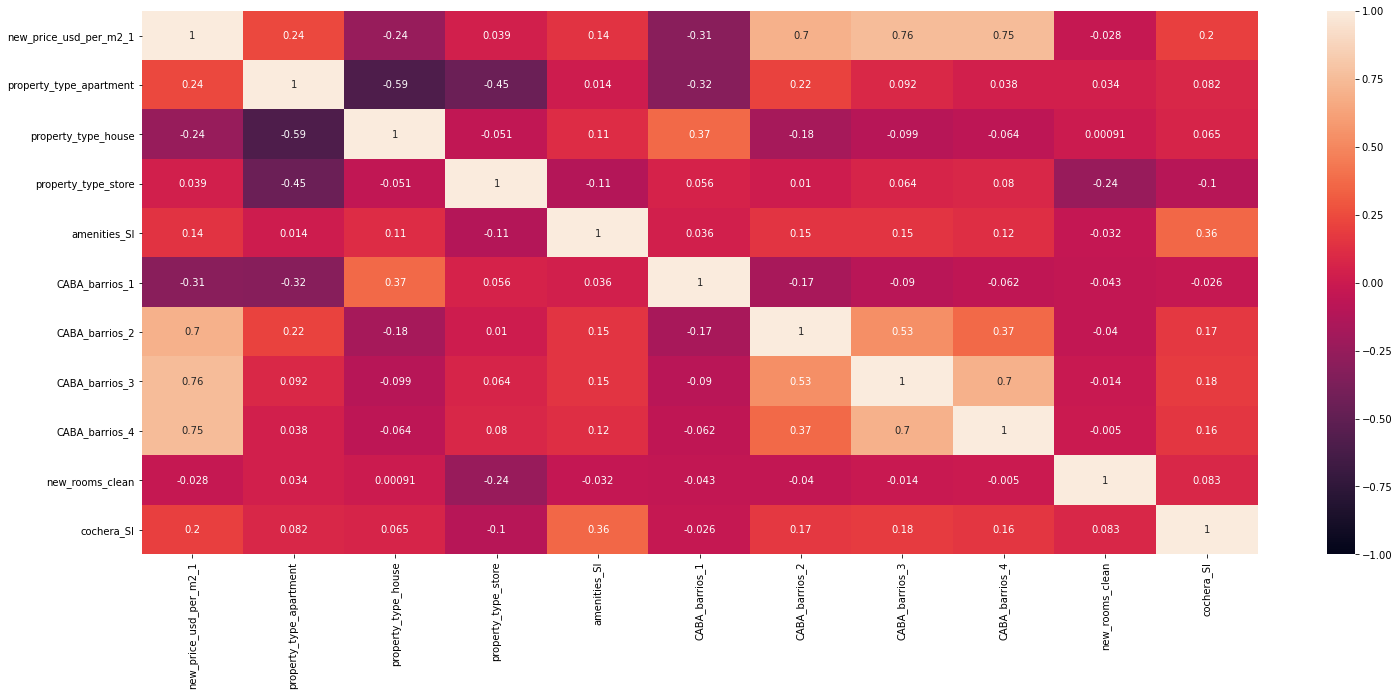

In [276]:
#Modificamos el tamaño del plot y generamos un heatmap de correlacion en CABA entre variables que consideramos a priri 
plt.figure(figsize = (25 , 10))
sns.heatmap(df_caba_dummies_drop[["new_price_usd_per_m2_1","property_type_apartment","property_type_house","property_type_store","amenities_SI","CABA_barrios_1","CABA_barrios_2","CABA_barrios_3","CABA_barrios_4","new_rooms_clean"
                ,"cochera_SI"]].corr(), annot=True, vmin=-1)
print(df_pais.columns)



In [277]:
#copiamos el dataset para poder modificarlo
df_caba_scale = df_caba_dummies_drop
df_caba_minmax = df_caba_dummies_drop

#estandarizamos por Scale las variables, debemos de probar las diferentes estandarizaciones para ver si alguna mejora el resultado del set
scaler = preprocessing.MinMaxScaler()

df_caba_minmax["new_price_usd_per_m2_1_n"] = scaler.fit_transform(df_caba_minmax[["new_price_usd_per_m2_1"]])
df_caba_minmax["surface_total_in_m2_clean_n"] = scaler.fit_transform(df_caba_minmax[["surface_total_in_m2_clean"]])
#estandarizamos por Scale las variables, debemos de probar las diferentes estandarizaciones para ver si alguna mejora el resultado del set
df_caba_scale["new_price_usd_per_m2_1_n"] = preprocessing.scale(df_caba_scale["new_price_usd_per_m2_1"])
df_caba_scale["surface_total_in_m2_clean_n"] = preprocessing.scale(df_caba_scale["surface_total_in_m2_clean"])
df_caba_scale["surface_covered_in_m2_n"] = preprocessing.scale(df_caba_scale["surface_covered_in_m2"])
df_caba_scale["new_rooms_clean_n"] = preprocessing.scale(df_caba_scale["new_rooms_clean"])


#dropeamos las variables excedentes
df_caba_minmax = df_caba_minmax.drop(["new_price_usd_per_m2_1","surface_total_in_m2_clean","surface_covered_in_m2","new_rooms_clean"], axis=1)
df_caba_scale = df_caba_scale.drop(["new_price_usd_per_m2_1","surface_total_in_m2_clean","surface_covered_in_m2","new_rooms_clean"], axis=1)
df_caba_dummies_drop = df_caba_dummies_drop.drop(["new_price_usd_per_m2_1_n","surface_total_in_m2_clean_n","surface_covered_in_m2_n","new_rooms_clean_n"], axis=1) 
df_caba_scale



,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,CABA_barrios_1,CABA_barrios_2,CABA_barrios_3,CABA_barrios_4,new_price_usd_per_m2_1_n,surface_total_in_m2_clean_n,surface_covered_in_m2_n,new_rooms_clean_n
0,0,0,0,0,0,0,0,0,0,-1.318354,-0.050659,-0.048422,-0.096519
1,1,0,0,0,0,0,0,0,0,-1.154940,-0.050659,-0.036103,-0.096519
4,1,0,0,0,0,0,1,0,0,0.424729,-0.058831,-0.048422,-0.701876
5,1,0,0,0,0,0,1,0,0,0.364810,-0.042486,-0.031997,-0.096519
8,1,0,0,1,0,0,0,0,0,-0.323653,-0.054745,-0.056635,-0.701876
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92660,1,0,0,0,0,0,1,0,0,0.015604,0.032701,0.047668,-1.307232
92707,1,0,0,0,0,0,1,0,0,0.015604,0.032701,0.047668,-1.307232
92708,1,0,0,1,1,0,1,1,1,4.588266,-0.003258,-0.004894,-1.307232
92710,1,0,0,1,0,0,1,0,0,0.237809,-0.058014,-0.049244,-0.701876


In [278]:
#Quitamos las variables que no vamos a incluir en el modelo

X_caba = df_caba_scale.drop(['new_price_usd_per_m2_1_n',"surface_covered_in_m2_n",], axis=1)
y_caba = df_caba_scale["new_price_usd_per_m2_1_n"]

#spliteamos en set de testeo y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_caba, y_caba, test_size=0.25, random_state=10)



In [279]:
#probamos el modelo Lineal

lm = linear_model.LinearRegression()

model_1 = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))
print('Score model_1:', model_1.score(X_test, y_test))



MAE: 0.27845000450746893
MSE: 0.17099637833959236
RMSE: 0.4135170834918339
R2: 0.8313400105324281
Score model_1: 0.8313400105324281


In [280]:
#probamos el modelo Ridge
lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 25, 50 ],\
                                        normalize=True, cv=4) 
# Definimos el rango de de búsqueda del hiperparametro explicitamente

model_2 = lm_ridge.fit(X_train, y_train)
y_pred = lm_ridge.predict(X_test)
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))
print('Score model_2:', model_2.score(X_test, y_test))


MAE: 0.2784495518768554
MSE: 0.1709963168352905
RMSE: 0.4135170091245226
R2: 0.8313400711963732
Score model_2: 0.8313400711963732


In [281]:
lm_ridge.alpha_

1e-05

In [282]:
#probamos el modelo Lasso
lm_lasso = linear_model.LassoCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 15, 25, 50],\
                                        normalize=True, cv=4)

model_3 = lm_lasso.fit(X_train, y_train)
y_pred = lm_lasso.predict(X_test)

print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))
print('Score model_3:', model_3.score(X_test,y_test))


MAE: 0.2786139632301914
MSE: 0.1717590197570246
RMSE: 0.4144381977533256
R2: 0.8305877893761636
Score model_3: 0.8305877893761636


In [283]:
lm_lasso.alpha_

0.0001

# 2. BSAS Zona Sur

In [317]:
#generamos Dummies por cada variable cualitativas
df_bsas_sur_dummies = pd.get_dummies(data=df_bsas_sur,columns=['property_type',"amenities","cochera"], drop_first=True)
#df_rooms_clean.to_csv("../Data/properati_train_prueba.csv", index=False)
df_bsas_sur_dummies

,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,new_rooms,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI
54,61,sell,Fincas de Iraola,|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|...,Argentina,NaN,"-34.8222793407,-58.1808181479",-34.822279,-58.180818,460000.0,...,NaN,0.0,290.0,1586.206897,Fincas de Iraola,0,1,0,0,0
99,127,sell,Lanús Este,|Argentina|Bs.As. G.B.A. Zona Sur|Lanús|Lanús ...,Argentina,NaN,"-34.7114415818,-58.3792223609",-34.711442,-58.379222,120000.0,...,4.0,4.0,95.0,1263.157895,Lanús Este,0,1,0,0,0
103,131,sell,Banfield,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,3436152.0,"-34.7380101,-58.4038541",-34.738010,-58.403854,165000.0,...,NaN,0.0,80.0,2062.500000,Banfield,0,1,0,0,0
125,160,sell,Quilmes,|Argentina|Bs.As. G.B.A. Zona Sur|Quilmes|Quil...,Argentina,3429651.0,"-34.732179,-58.271759",-34.732179,-58.271759,130000.0,...,3.0,3.0,94.0,1382.978723,Quilmes,0,0,0,0,0
197,261,sell,Las Golondrinas,|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|...,Argentina,NaN,NaN,NaN,NaN,330000.0,...,NaN,0.0,205.0,1609.756098,Las Golondrinas,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92617,121105,sell,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|La ...,Argentina,3432039.0,NaN,NaN,NaN,69000.0,...,NaN,0.0,42.0,1642.857143,La Plata,1,0,0,0,0
92634,121130,sell,Banfield,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,3436152.0,NaN,NaN,NaN,95000.0,...,NaN,0.0,12.0,7916.666667,Banfield,0,0,0,0,0
92642,121140,sell,Altos de Hudson I,|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|...,Argentina,NaN,NaN,NaN,NaN,375000.0,...,NaN,0.0,213.0,1760.563380,Altos de Hudson I,0,1,0,1,0
92645,121145,sell,Banfield,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,3436152.0,NaN,NaN,NaN,290000.0,...,NaN,0.0,170.0,1705.882353,Banfield,0,1,0,1,1


In [318]:
bsas_min = df_bsas_sur_dummies["new_price_usd_per_m2_1"]<1000
bsas_2000 = (df_bsas_sur_dummies["new_price_usd_per_m2_1"]>1000)  & (df_bsas_sur_dummies["new_price_usd_per_m2_1"]>1500)
bsas_3200 = (df_bsas_sur_dummies["new_price_usd_per_m2_1"]>=1500)  & (df_bsas_sur_dummies["new_price_usd_per_m2_1"]>2000)
bsas_max = (df_bsas_sur_dummies["new_price_usd_per_m2_1"]>=2000)

df_bsas_sur_dummies["barrios_1"] = ""
df_bsas_sur_dummies["barrios_2"] = ""
df_bsas_sur_dummies["barrios_3"] = ""
df_bsas_sur_dummies["barrios_4"] = ""

df_bsas_sur_dummies

,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4
54,61,sell,Fincas de Iraola,|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|...,Argentina,NaN,"-34.8222793407,-58.1808181479",-34.822279,-58.180818,460000.0,...,Fincas de Iraola,0,1,0,0,0,,,,
99,127,sell,Lanús Este,|Argentina|Bs.As. G.B.A. Zona Sur|Lanús|Lanús ...,Argentina,NaN,"-34.7114415818,-58.3792223609",-34.711442,-58.379222,120000.0,...,Lanús Este,0,1,0,0,0,,,,
103,131,sell,Banfield,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,3436152.0,"-34.7380101,-58.4038541",-34.738010,-58.403854,165000.0,...,Banfield,0,1,0,0,0,,,,
125,160,sell,Quilmes,|Argentina|Bs.As. G.B.A. Zona Sur|Quilmes|Quil...,Argentina,3429651.0,"-34.732179,-58.271759",-34.732179,-58.271759,130000.0,...,Quilmes,0,0,0,0,0,,,,
197,261,sell,Las Golondrinas,|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|...,Argentina,NaN,NaN,NaN,NaN,330000.0,...,Las Golondrinas,0,1,0,1,0,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92617,121105,sell,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|La ...,Argentina,3432039.0,NaN,NaN,NaN,69000.0,...,La Plata,1,0,0,0,0,,,,
92634,121130,sell,Banfield,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,3436152.0,NaN,NaN,NaN,95000.0,...,Banfield,0,0,0,0,0,,,,
92642,121140,sell,Altos de Hudson I,|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|...,Argentina,NaN,NaN,NaN,NaN,375000.0,...,Altos de Hudson I,0,1,0,1,0,,,,
92645,121145,sell,Banfield,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,3436152.0,NaN,NaN,NaN,290000.0,...,Banfield,0,1,0,1,1,,,,


In [319]:
df_bsas_sur_dummies.loc[bsas_min, "barrios_1"] = 1
df_bsas_sur_dummies.loc[bsas_2000, "barrios_2"] = 1
df_bsas_sur_dummies.loc[bsas_3200, "barrios_3"] = 1
df_bsas_sur_dummies.loc[bsas_max, "barrios_4"] = 1

df_bsas_sur_dummies["barrios_1"] = df_bsas_sur_dummies["barrios_1"].replace("",0) 
df_bsas_sur_dummies["barrios_2"] = df_bsas_sur_dummies["barrios_2"].replace("",0) 
df_bsas_sur_dummies["barrios_3"] = df_bsas_sur_dummies["barrios_3"].replace("",0) 
df_bsas_sur_dummies["barrios_4"] = df_bsas_sur_dummies["barrios_4"].replace("",0) 
df_bsas_sur_dummies

,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4
54,61,sell,Fincas de Iraola,|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|...,Argentina,NaN,"-34.8222793407,-58.1808181479",-34.822279,-58.180818,460000.0,...,Fincas de Iraola,0,1,0,0,0,0,1,0,0
99,127,sell,Lanús Este,|Argentina|Bs.As. G.B.A. Zona Sur|Lanús|Lanús ...,Argentina,NaN,"-34.7114415818,-58.3792223609",-34.711442,-58.379222,120000.0,...,Lanús Este,0,1,0,0,0,0,0,0,0
103,131,sell,Banfield,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,3436152.0,"-34.7380101,-58.4038541",-34.738010,-58.403854,165000.0,...,Banfield,0,1,0,0,0,0,1,1,1
125,160,sell,Quilmes,|Argentina|Bs.As. G.B.A. Zona Sur|Quilmes|Quil...,Argentina,3429651.0,"-34.732179,-58.271759",-34.732179,-58.271759,130000.0,...,Quilmes,0,0,0,0,0,0,0,0,0
197,261,sell,Las Golondrinas,|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|...,Argentina,NaN,NaN,NaN,NaN,330000.0,...,Las Golondrinas,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92617,121105,sell,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|La ...,Argentina,3432039.0,NaN,NaN,NaN,69000.0,...,La Plata,1,0,0,0,0,0,1,0,0
92634,121130,sell,Banfield,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,3436152.0,NaN,NaN,NaN,95000.0,...,Banfield,0,0,0,0,0,0,1,1,1
92642,121140,sell,Altos de Hudson I,|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|...,Argentina,NaN,NaN,NaN,NaN,375000.0,...,Altos de Hudson I,0,1,0,1,0,0,1,0,0
92645,121145,sell,Banfield,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,3436152.0,NaN,NaN,NaN,290000.0,...,Banfield,0,1,0,1,1,0,1,0,0


In [320]:
#regularizacion de variables no numericas dropeandolas
df_bsas_sur_dummies_drop = df_bsas_sur_dummies.drop(["pileta","parrilla","jardin","gym",'Unnamed: 0',"place_with_parent_names", 'operation', 'place_name',"country_name","geonames_id","lat-lon","lat","lon","price","currency","price_aprox_local_currency","price_aprox_usd","surface_total_in_m2","price_usd_per_m2","price_per_m2","floor", "rooms",	"expenses",	"properati_url",	"description",	"title",	"image_thumbnail",	"counter",	"nulos","new_rooms", "place_name_clean"  ], axis=1) 


In [321]:
#topes maximos y minimos, tenemos que hacer max i min cuadrados para que esto sea justificado correctamente
df_bsas_sur_dummies_drop = df_bsas_sur_dummies_drop[df_bsas_sur_dummies_drop['new_price_usd_per_m2_1'] < 4500]
df_bsas_sur_dummies_drop = df_bsas_sur_dummies_drop[df_bsas_sur_dummies_drop['new_price_usd_per_m2_1'] > 100]
#df_caba = df_caba.new_price_usd_per_m2_1
df_bsas_sur_dummies_drop

,surface_covered_in_m2,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4
54,220.0,0.0,290.0,1586.206897,0,1,0,0,0,0,1,0,0
99,95.0,4.0,95.0,1263.157895,0,1,0,0,0,0,0,0,0
103,70.0,0.0,80.0,2062.500000,0,1,0,0,0,0,1,1,1
125,94.0,3.0,94.0,1382.978723,0,0,0,0,0,0,0,0,0
197,175.0,0.0,205.0,1609.756098,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92598,83.0,0.0,83.0,1626.506024,0,0,0,0,0,0,1,0,0
92617,42.0,0.0,42.0,1642.857143,1,0,0,0,0,0,1,0,0
92642,213.0,0.0,213.0,1760.563380,0,1,0,1,0,0,1,0,0
92645,170.0,0.0,170.0,1705.882353,0,1,0,1,1,0,1,0,0


In [322]:
#copiamos el dataset para poder modificarlo
df_bsas_sur_scale = df_bsas_sur_dummies_drop
df_bsas_sur_minmax = df_bsas_sur_dummies_drop

#estandarizamos por Scale las variables, debemos de probar las diferentes estandarizaciones para ver si alguna mejora el resultado del set
scaler = preprocessing.MinMaxScaler()

df_bsas_sur_minmax["new_price_usd_per_m2_1_n"] = scaler.fit_transform(df_bsas_sur_minmax[["new_price_usd_per_m2_1"]])
#estandarizamos por Scale las variables, debemos de probar las diferentes estandarizaciones para ver si alguna mejora el resultado del set
df_bsas_sur_scale["new_price_usd_per_m2_1_n"] = preprocessing.scale(df_bsas_sur_scale["new_price_usd_per_m2_1"])
df_bsas_sur_scale["surface_total_in_m2_clean_n"] = preprocessing.scale(df_bsas_sur_scale["surface_total_in_m2_clean"])
df_bsas_sur_scale["surface_covered_in_m2_n"] = preprocessing.scale(df_bsas_sur_scale["surface_covered_in_m2"])
df_bsas_sur_scale["new_rooms_clean_n"] = preprocessing.scale(df_bsas_sur_scale["new_rooms_clean"])



In [323]:
#dropeamos las variables excedentes
df_bsas_sur_minmax = df_bsas_sur_minmax.drop(["new_price_usd_per_m2_1","new_rooms_clean","surface_covered_in_m2","surface_total_in_m2_clean"], axis=1)
df_bsas_sur_scale = df_bsas_sur_scale.drop(["new_price_usd_per_m2_1","new_rooms_clean","surface_covered_in_m2","surface_total_in_m2_clean"], axis=1)
df_bsas_sur_dummies_drop = df_bsas_sur_dummies_drop.drop(["new_price_usd_per_m2_1_n","new_rooms_clean_n","surface_covered_in_m2_n","surface_total_in_m2_clean_n"], axis=1) 
df_bsas_sur_scale


,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4,new_price_usd_per_m2_1_n,surface_total_in_m2_clean_n,surface_covered_in_m2_n,new_rooms_clean_n
54,0,1,0,0,0,0,1,0,0,0.120535,0.344822,0.257720,-0.766347
99,0,1,0,0,0,0,0,0,0,-0.371463,-0.235165,-0.168911,1.723958
103,0,1,0,0,0,0,1,1,1,0.845921,-0.279779,-0.254237,-0.766347
125,0,0,0,0,0,0,0,0,0,-0.188978,-0.238139,-0.172324,1.101382
197,0,1,0,1,0,0,1,0,0,0.156400,0.092007,0.104133,-0.766347
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92598,0,0,0,0,0,0,1,0,0,0.181910,-0.270856,-0.209868,-0.766347
92617,1,0,0,0,0,0,1,0,0,0.206812,-0.392802,-0.349803,-0.766347
92642,0,1,0,1,0,0,1,0,0,0.386077,0.115801,0.233828,-0.766347
92645,0,1,0,1,1,0,1,0,0,0.302798,-0.012093,0.087067,-0.766347


In [324]:
#Quitamos las variables que no vamos a incluir en el modelo

X_bsas_sur = df_bsas_sur_scale.drop(['new_price_usd_per_m2_1_n',"surface_covered_in_m2_n",], axis=1)
y_bsas_sur = df_bsas_sur_scale["new_price_usd_per_m2_1_n"]

#spliteamos en set de testeo y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_bsas_sur, y_bsas_sur, test_size=0.25, random_state=10)

X_bsas_sur

,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4,surface_total_in_m2_clean_n,new_rooms_clean_n
54,0,1,0,0,0,0,1,0,0,0.344822,-0.766347
99,0,1,0,0,0,0,0,0,0,-0.235165,1.723958
103,0,1,0,0,0,0,1,1,1,-0.279779,-0.766347
125,0,0,0,0,0,0,0,0,0,-0.238139,1.101382
197,0,1,0,1,0,0,1,0,0,0.092007,-0.766347
...,...,...,...,...,...,...,...,...,...,...,...
92598,0,0,0,0,0,0,1,0,0,-0.270856,-0.766347
92617,1,0,0,0,0,0,1,0,0,-0.392802,-0.766347
92642,0,1,0,1,0,0,1,0,0,0.115801,-0.766347
92645,0,1,0,1,1,0,1,0,0,-0.012093,-0.766347


In [325]:
#probamos el modelo Lineal

lm = linear_model.LinearRegression()

model_1 = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))
print('Score model_1:', model_1.score(X_test, y_test))



MAE: 0.2733150616569572
MSE: 0.15836837274080132
RMSE: 0.3979552396197358
R2: 0.8488497729126929
Score model_1: 0.8488497729126929


In [326]:
#probamos el modelo Ridge
lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 25, 50 ],\
                                        normalize=True, cv=4) 
# Definimos el rango de de búsqueda del hiperparametro explicitamente

model_2 = lm_ridge.fit(X_train, y_train)
y_pred = lm_ridge.predict(X_test)
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))
print('Score model_2:', model_2.score(X_test, y_test))

MAE: 0.2733146176503305
MSE: 0.15836865309615789
RMSE: 0.3979555918644163
R2: 0.8488495053354294
Score model_2: 0.8488495053354294


# 3.BSAS Costa Atlántica


In [327]:
#generamos Dummies por cada variable cualitativas
df_bsas_costa_dummies = pd.get_dummies(data=df_bsas_costa,columns=['property_type',"amenities","cochera"], drop_first=True)
#df_rooms_clean.to_csv("../Data/properati_train_prueba.csv", index=False)
df_bsas_costa_dummies


,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,new_rooms,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI
2,4,sell,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,...,NaN,0.0,35.0,1828.571429,Mar del Plata Centro,1,0,0,0,0
58,68,sell,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3430863.0,"-38.034794,-57.5416872",-38.034794,-57.541687,235000.0,...,NaN,2.0,72.0,3263.888889,Mar del Plata,1,0,0,1,0
59,69,sell,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3430863.0,"-38.0150119,-57.5341134",-38.015012,-57.534113,350000.0,...,NaN,6.0,332.0,1054.216867,Mar del Plata,0,1,0,0,0
61,74,sell,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3430863.0,"-38.0089211,-57.5461427",-38.008921,-57.546143,51000.0,...,1.0,1.0,29.0,1758.620690,Mar del Plata,1,0,0,0,0
62,75,sell,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3430863.0,"-38.000151,-57.54315",-38.000151,-57.543150,175000.0,...,3.0,3.0,90.0,1944.444444,Mar del Plata,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92418,120308,sell,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3430863.0,NaN,NaN,NaN,150000.0,...,2.0,2.0,100.0,1500.000000,Mar del Plata,1,0,0,0,1
92419,120309,sell,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3430863.0,NaN,NaN,NaN,2650000.0,...,2.0,2.0,100.0,1486.217400,Mar del Plata,1,0,0,0,1
92590,121072,sell,Villa Gesell,|Argentina|Buenos Aires Costa Atlántica|Villa ...,Argentina,3427431.0,NaN,NaN,NaN,120000.0,...,5.0,5.0,90.0,1333.333333,Villa Gesell,1,0,0,0,1
92641,121139,sell,Punta Iglesia,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,NaN,NaN,NaN,NaN,80523.0,...,3.0,3.0,37.0,2176.297297,Mar del Plata Punta Iglesia,1,0,0,1,1


In [328]:
bsas_min = df_bsas_costa_dummies["new_price_usd_per_m2_1"]<1000
bsas_2000 = (df_bsas_costa_dummies["new_price_usd_per_m2_1"]>1000)  & (df_bsas_costa_dummies["new_price_usd_per_m2_1"]>1500)
bsas_3200 = (df_bsas_costa_dummies["new_price_usd_per_m2_1"]>=1500)  & (df_bsas_costa_dummies["new_price_usd_per_m2_1"]>2000)
bsas_max = (df_bsas_costa_dummies["new_price_usd_per_m2_1"]>=2000)

df_bsas_costa_dummies["barrios_1"] = ""
df_bsas_costa_dummies["barrios_2"] = ""
df_bsas_costa_dummies["barrios_3"] = ""
df_bsas_costa_dummies["barrios_4"] = ""

df_bsas_costa_dummies

,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4
2,4,sell,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,...,Mar del Plata Centro,1,0,0,0,0,,,,
58,68,sell,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3430863.0,"-38.034794,-57.5416872",-38.034794,-57.541687,235000.0,...,Mar del Plata,1,0,0,1,0,,,,
59,69,sell,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3430863.0,"-38.0150119,-57.5341134",-38.015012,-57.534113,350000.0,...,Mar del Plata,0,1,0,0,0,,,,
61,74,sell,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3430863.0,"-38.0089211,-57.5461427",-38.008921,-57.546143,51000.0,...,Mar del Plata,1,0,0,0,0,,,,
62,75,sell,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3430863.0,"-38.000151,-57.54315",-38.000151,-57.543150,175000.0,...,Mar del Plata,1,0,0,0,0,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92418,120308,sell,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3430863.0,NaN,NaN,NaN,150000.0,...,Mar del Plata,1,0,0,0,1,,,,
92419,120309,sell,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3430863.0,NaN,NaN,NaN,2650000.0,...,Mar del Plata,1,0,0,0,1,,,,
92590,121072,sell,Villa Gesell,|Argentina|Buenos Aires Costa Atlántica|Villa ...,Argentina,3427431.0,NaN,NaN,NaN,120000.0,...,Villa Gesell,1,0,0,0,1,,,,
92641,121139,sell,Punta Iglesia,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,NaN,NaN,NaN,NaN,80523.0,...,Mar del Plata Punta Iglesia,1,0,0,1,1,,,,


In [329]:
df_bsas_costa_dummies.loc[bsas_min, "barrios_1"] = 1
df_bsas_costa_dummies.loc[bsas_2000, "barrios_2"] = 1
df_bsas_costa_dummies.loc[bsas_3200, "barrios_3"] = 1
df_bsas_costa_dummies.loc[bsas_max, "barrios_4"] = 1

df_bsas_costa_dummies["barrios_1"] = df_bsas_costa_dummies["barrios_1"].replace("",0) 
df_bsas_costa_dummies["barrios_2"] = df_bsas_costa_dummies["barrios_2"].replace("",0) 
df_bsas_costa_dummies["barrios_3"] = df_bsas_costa_dummies["barrios_3"].replace("",0) 
df_bsas_costa_dummies["barrios_4"] = df_bsas_costa_dummies["barrios_4"].replace("",0) 
df_bsas_costa_dummies

,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4
2,4,sell,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,...,Mar del Plata Centro,1,0,0,0,0,0,1,0,0
58,68,sell,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3430863.0,"-38.034794,-57.5416872",-38.034794,-57.541687,235000.0,...,Mar del Plata,1,0,0,1,0,0,1,1,1
59,69,sell,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3430863.0,"-38.0150119,-57.5341134",-38.015012,-57.534113,350000.0,...,Mar del Plata,0,1,0,0,0,0,0,0,0
61,74,sell,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3430863.0,"-38.0089211,-57.5461427",-38.008921,-57.546143,51000.0,...,Mar del Plata,1,0,0,0,0,0,1,0,0
62,75,sell,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3430863.0,"-38.000151,-57.54315",-38.000151,-57.543150,175000.0,...,Mar del Plata,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92418,120308,sell,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3430863.0,NaN,NaN,NaN,150000.0,...,Mar del Plata,1,0,0,0,1,0,0,0,0
92419,120309,sell,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3430863.0,NaN,NaN,NaN,2650000.0,...,Mar del Plata,1,0,0,0,1,0,0,0,0
92590,121072,sell,Villa Gesell,|Argentina|Buenos Aires Costa Atlántica|Villa ...,Argentina,3427431.0,NaN,NaN,NaN,120000.0,...,Villa Gesell,1,0,0,0,1,0,0,0,0
92641,121139,sell,Punta Iglesia,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,NaN,NaN,NaN,NaN,80523.0,...,Mar del Plata Punta Iglesia,1,0,0,1,1,0,1,1,1


In [330]:
#regularizacion de variables no numericas dropeandolas
df_bsas_costa_dummies_drop = df_bsas_costa_dummies.drop(["pileta","parrilla","jardin","gym",'Unnamed: 0',"place_with_parent_names", 'operation', 'place_name',"country_name","geonames_id","lat-lon","lat","lon","price","currency","price_aprox_local_currency","price_aprox_usd","surface_total_in_m2","price_usd_per_m2","price_per_m2","floor", "rooms",	"expenses",	"properati_url",	"description",	"title",	"image_thumbnail",	"counter",	"nulos","new_rooms", "place_name_clean"  ], axis=1) 


In [331]:
#topes maximos y minimos, tenemos que hacer max i min cuadrados para que esto sea justificado correctamente
df_bsas_costa_dummies_drop = df_bsas_costa_dummies_drop[df_bsas_costa_dummies_drop['new_price_usd_per_m2_1'] < 8000]
df_bsas_costa_dummies_drop = df_bsas_costa_dummies_drop[df_bsas_costa_dummies_drop['new_price_usd_per_m2_1'] > 100]
#df_caba = df_caba.new_price_usd_per_m2_1
df_bsas_costa_dummies_drop

,surface_covered_in_m2,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4
2,35.0,0.0,35.0,1828.571429,1,0,0,0,0,0,1,0,0
58,72.0,2.0,72.0,3263.888889,1,0,0,1,0,0,1,1,1
59,207.0,6.0,332.0,1054.216867,0,1,0,0,0,0,0,0,0
61,29.0,1.0,29.0,1758.620690,1,0,0,0,0,0,1,0,0
62,90.0,3.0,90.0,1944.444444,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92418,95.0,2.0,100.0,1500.000000,1,0,0,0,1,0,0,0,0
92419,95.0,2.0,100.0,1486.217400,1,0,0,0,1,0,0,0,0
92590,90.0,5.0,90.0,1333.333333,1,0,0,0,1,0,0,0,0
92641,37.0,3.0,37.0,2176.297297,1,0,0,1,1,0,1,1,1


In [332]:
#copiamos el dataset para poder modificarlo
df_bsas_costa_scale = df_bsas_costa_dummies_drop
df_bsas_costa_minmax = df_bsas_costa_dummies_drop

#estandarizamos por Scale las variables, debemos de probar las diferentes estandarizaciones para ver si alguna mejora el resultado del set
scaler = preprocessing.MinMaxScaler()

df_bsas_costa_minmax["new_price_usd_per_m2_1_n"] = scaler.fit_transform(df_bsas_costa_minmax[["new_price_usd_per_m2_1"]])
#estandarizamos por Scale las variables, debemos de probar las diferentes estandarizaciones para ver si alguna mejora el resultado del set
df_bsas_costa_scale["new_price_usd_per_m2_1_n"] = preprocessing.scale(df_bsas_costa_scale["new_price_usd_per_m2_1"])
df_bsas_costa_scale["surface_total_in_m2_clean_n"] = preprocessing.scale(df_bsas_costa_scale["surface_total_in_m2_clean"])
df_bsas_costa_scale["surface_covered_in_m2_n"] = preprocessing.scale(df_bsas_costa_scale["surface_covered_in_m2"])
df_bsas_costa_scale["new_rooms_clean_n"] = preprocessing.scale(df_bsas_costa_scale["new_rooms_clean"])


In [333]:
#dropeamos las variables excedentes
df_bsas_costa_minmax = df_bsas_costa_minmax.drop(["new_price_usd_per_m2_1","new_rooms_clean","surface_covered_in_m2","surface_total_in_m2_clean"], axis=1)
df_bsas_costa_scale = df_bsas_costa_scale.drop(["new_price_usd_per_m2_1","new_rooms_clean","surface_covered_in_m2","surface_total_in_m2_clean"], axis=1)
df_bsas_costa_dummies_drop = df_bsas_costa_dummies_drop.drop(["new_price_usd_per_m2_1_n","new_rooms_clean_n","surface_covered_in_m2_n","surface_total_in_m2_clean_n"], axis=1) 
df_bsas_costa_scale

,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4,new_price_usd_per_m2_1_n,surface_total_in_m2_clean_n,surface_covered_in_m2_n,new_rooms_clean_n
2,1,0,0,0,0,0,1,0,0,0.271672,-0.412608,-0.119370,-1.687080
58,1,0,0,1,0,0,1,1,1,2.107939,-0.275595,-0.056319,-0.341124
59,0,1,0,0,0,0,0,0,0,-0.718994,0.687202,0.173732,2.350788
61,1,0,0,0,0,0,1,0,0,0.182181,-0.434827,-0.129594,-1.014102
62,1,0,0,0,0,0,1,0,0,0.419914,-0.208940,-0.025645,0.331854
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92418,1,0,0,0,1,0,0,0,0,-0.148684,-0.171909,-0.017125,-0.341124
92419,1,0,0,0,1,0,0,0,0,-0.166317,-0.171909,-0.017125,-0.341124
92590,1,0,0,0,1,0,0,0,0,-0.361908,-0.208940,-0.025645,1.677810
92641,1,0,0,1,1,0,1,1,1,0.716534,-0.405202,-0.115961,0.331854


In [334]:
#Quitamos las variables que no vamos a incluir en el modelo

X_bsas_costa = df_bsas_costa_scale.drop(['new_price_usd_per_m2_1_n',"surface_covered_in_m2_n",], axis=1)
y_bsas_costa = df_bsas_costa_scale["new_price_usd_per_m2_1_n"]

#spliteamos en set de testeo y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_bsas_costa, y_bsas_costa, test_size=0.25, random_state=10)

X_bsas_costa

,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4,surface_total_in_m2_clean_n,new_rooms_clean_n
2,1,0,0,0,0,0,1,0,0,-0.412608,-1.687080
58,1,0,0,1,0,0,1,1,1,-0.275595,-0.341124
59,0,1,0,0,0,0,0,0,0,0.687202,2.350788
61,1,0,0,0,0,0,1,0,0,-0.434827,-1.014102
62,1,0,0,0,0,0,1,0,0,-0.208940,0.331854
...,...,...,...,...,...,...,...,...,...,...,...
92418,1,0,0,0,1,0,0,0,0,-0.171909,-0.341124
92419,1,0,0,0,1,0,0,0,0,-0.171909,-0.341124
92590,1,0,0,0,1,0,0,0,0,-0.208940,1.677810
92641,1,0,0,1,1,0,1,1,1,-0.405202,0.331854


In [335]:
#probamos el modelo Lineal

lm = linear_model.LinearRegression()

model_1 = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))
print('Score model_1:', model_1.score(X_test, y_test))


MAE: 0.2614820741553874
MSE: 0.14028808496572365
RMSE: 0.3745505105666306
R2: 0.853727575270935
Score model_1: 0.853727575270935


In [336]:
#probamos el modelo Ridge
lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 25, 50 ],\
                                        normalize=True, cv=4) 
# Definimos el rango de de búsqueda del hiperparametro explicitamente

model_2 = lm_ridge.fit(X_train, y_train)
y_pred = lm_ridge.predict(X_test)
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))
print('Score model_2:', model_2.score(X_test, y_test))

MAE: 0.26135044508540184
MSE: 0.1402556503390364
RMSE: 0.37450720999606457
R2: 0.8537613934778903
Score model_2: 0.8537613934778903


# 4 BSAS Zona Norte

In [337]:
#generamos Dummies por cada variable cualitativas
df_bsas_norte_dummies = pd.get_dummies(data=df_bsas_norte,columns=['property_type',"amenities","cochera"], drop_first=True)
#df_rooms_clean.to_csv("../Data/properati_train_prueba.csv", index=False)
df_bsas_norte_dummies

 


,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,new_rooms,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI
3,6,sell,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782,130000.0,...,NaN,0.0,106.0,1226.415094,Munro,0,0,0,0,0
7,12,sell,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,3430813.0,"-34.4860195,-58.5038139",-34.486019,-58.503814,115000.0,...,2.0,2.0,39.0,2948.717949,Martínez,1,0,0,0,0
10,15,sell,Bella Vista,|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel...,Argentina,3436061.0,"-34.5879112015,-58.6987828445",-34.587911,-58.698783,250000.0,...,NaN,0.0,164.0,1524.390244,Bella Vista,0,1,0,0,1
12,17,sell,Barrio El Golf,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,NaN,"-34.4087174767,-58.6343892841",-34.408717,-58.634389,315000.0,...,3.0,3.0,176.0,1789.772727,Barrio El Golf,1,0,0,0,1
13,18,sell,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Argentina,3427753.0,"-34.425087,-58.5796585",-34.425087,-58.579658,570000.0,...,NaN,0.0,270.0,2111.111111,Tigre,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92643,121141,sell,Bs.As. G.B.A. Zona Norte,|Argentina|Bs.As. G.B.A. Zona Norte|,Argentina,3435907.0,NaN,NaN,NaN,550000.0,...,NaN,0.0,362.0,1519.337017,Bs.As. G.B.A. Zona Norte,0,1,0,1,1
92644,121143,sell,San Fernando,|Argentina|Bs.As. G.B.A. Zona Norte|San Fernando|,Argentina,3429088.0,NaN,NaN,NaN,305000.0,...,NaN,0.0,96.0,3177.083333,San Fernando,1,0,0,0,0
92655,121155,sell,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Argentina,3429979.0,NaN,NaN,NaN,170000.0,...,NaN,0.0,130.0,1307.692308,Pilar,0,1,0,1,0
92656,121156,sell,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Argentina,3429979.0,NaN,NaN,NaN,170000.0,...,NaN,0.0,130.0,1307.692308,Pilar,0,1,0,1,0


In [338]:
bsas_min = df_bsas_norte_dummies["new_price_usd_per_m2_1"]<1000
bsas_2000 = (df_bsas_norte_dummies["new_price_usd_per_m2_1"]>1000)  & (df_bsas_norte_dummies["new_price_usd_per_m2_1"]>1500)
bsas_3200 = (df_bsas_norte_dummies["new_price_usd_per_m2_1"]>=1500)  & (df_bsas_norte_dummies["new_price_usd_per_m2_1"]>2000)
bsas_max = (df_bsas_norte_dummies["new_price_usd_per_m2_1"]>=2000)

df_bsas_norte_dummies["barrios_1"] = ""
df_bsas_norte_dummies["barrios_2"] = ""
df_bsas_norte_dummies["barrios_3"] = ""
df_bsas_norte_dummies["barrios_4"] = ""

df_bsas_norte_dummies

,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4
3,6,sell,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782,130000.0,...,Munro,0,0,0,0,0,,,,
7,12,sell,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,3430813.0,"-34.4860195,-58.5038139",-34.486019,-58.503814,115000.0,...,Martínez,1,0,0,0,0,,,,
10,15,sell,Bella Vista,|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel...,Argentina,3436061.0,"-34.5879112015,-58.6987828445",-34.587911,-58.698783,250000.0,...,Bella Vista,0,1,0,0,1,,,,
12,17,sell,Barrio El Golf,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,NaN,"-34.4087174767,-58.6343892841",-34.408717,-58.634389,315000.0,...,Barrio El Golf,1,0,0,0,1,,,,
13,18,sell,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Argentina,3427753.0,"-34.425087,-58.5796585",-34.425087,-58.579658,570000.0,...,Tigre,0,1,0,1,0,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92643,121141,sell,Bs.As. G.B.A. Zona Norte,|Argentina|Bs.As. G.B.A. Zona Norte|,Argentina,3435907.0,NaN,NaN,NaN,550000.0,...,Bs.As. G.B.A. Zona Norte,0,1,0,1,1,,,,
92644,121143,sell,San Fernando,|Argentina|Bs.As. G.B.A. Zona Norte|San Fernando|,Argentina,3429088.0,NaN,NaN,NaN,305000.0,...,San Fernando,1,0,0,0,0,,,,
92655,121155,sell,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Argentina,3429979.0,NaN,NaN,NaN,170000.0,...,Pilar,0,1,0,1,0,,,,
92656,121156,sell,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Argentina,3429979.0,NaN,NaN,NaN,170000.0,...,Pilar,0,1,0,1,0,,,,


In [339]:
df_bsas_norte_dummies.loc[bsas_min, "barrios_1"] = 1
df_bsas_norte_dummies.loc[bsas_2000, "barrios_2"] = 1
df_bsas_norte_dummies.loc[bsas_3200, "barrios_3"] = 1
df_bsas_norte_dummies.loc[bsas_max, "barrios_4"] = 1

df_bsas_norte_dummies["barrios_1"] = df_bsas_norte_dummies["barrios_1"].replace("",0) 
df_bsas_norte_dummies["barrios_2"] = df_bsas_norte_dummies["barrios_2"].replace("",0) 
df_bsas_norte_dummies["barrios_3"] = df_bsas_norte_dummies["barrios_3"].replace("",0) 
df_bsas_norte_dummies["barrios_4"] = df_bsas_norte_dummies["barrios_4"].replace("",0) 
df_bsas_norte_dummies

,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4
3,6,sell,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782,130000.0,...,Munro,0,0,0,0,0,0,0,0,0
7,12,sell,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,3430813.0,"-34.4860195,-58.5038139",-34.486019,-58.503814,115000.0,...,Martínez,1,0,0,0,0,0,1,1,1
10,15,sell,Bella Vista,|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel...,Argentina,3436061.0,"-34.5879112015,-58.6987828445",-34.587911,-58.698783,250000.0,...,Bella Vista,0,1,0,0,1,0,1,0,0
12,17,sell,Barrio El Golf,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,NaN,"-34.4087174767,-58.6343892841",-34.408717,-58.634389,315000.0,...,Barrio El Golf,1,0,0,0,1,0,1,0,0
13,18,sell,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Argentina,3427753.0,"-34.425087,-58.5796585",-34.425087,-58.579658,570000.0,...,Tigre,0,1,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92643,121141,sell,Bs.As. G.B.A. Zona Norte,|Argentina|Bs.As. G.B.A. Zona Norte|,Argentina,3435907.0,NaN,NaN,NaN,550000.0,...,Bs.As. G.B.A. Zona Norte,0,1,0,1,1,0,1,0,0
92644,121143,sell,San Fernando,|Argentina|Bs.As. G.B.A. Zona Norte|San Fernando|,Argentina,3429088.0,NaN,NaN,NaN,305000.0,...,San Fernando,1,0,0,0,0,0,1,1,1
92655,121155,sell,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Argentina,3429979.0,NaN,NaN,NaN,170000.0,...,Pilar,0,1,0,1,0,0,0,0,0
92656,121156,sell,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Argentina,3429979.0,NaN,NaN,NaN,170000.0,...,Pilar,0,1,0,1,0,0,0,0,0


In [345]:
#regularizacion de variables no numericas dropeandolas
df_bsas_norte_dummies_drop = df_bsas_norte_dummies.drop(["pileta","parrilla","jardin","gym",'Unnamed: 0',"place_with_parent_names", 'operation', 'place_name',"country_name","geonames_id","lat-lon","lat","lon","price","currency","price_aprox_local_currency","price_aprox_usd","surface_total_in_m2","price_usd_per_m2","price_per_m2","floor", "rooms",	"expenses",	"properati_url",	"description",	"title",	"image_thumbnail",	"counter",	"nulos","new_rooms", "place_name_clean"  ], axis=1) 


In [346]:
#topes maximos y minimos, tenemos que hacer max i min cuadrados para que esto sea justificado correctamente
df_bsas_norte_dummies_drop = df_bsas_norte_dummies_drop[df_bsas_norte_dummies_drop['new_price_usd_per_m2_1'] < 4500]
df_bsas_norte_dummies_drop = df_bsas_norte_dummies_drop[df_bsas_norte_dummies_drop['new_price_usd_per_m2_1'] > 100]
#df_caba = df_caba.new_price_usd_per_m2_1
df_bsas_norte_dummies_drop

,surface_covered_in_m2,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4
3,78.0,0.0,106.0,1226.415094,0,0,0,0,0,0,0,0,0
7,36.0,2.0,39.0,2948.717949,1,0,0,0,0,0,1,1,1
10,164.0,0.0,164.0,1524.390244,0,1,0,0,1,0,1,0,0
12,78.0,3.0,176.0,1789.772727,1,0,0,0,1,0,1,0,0
13,270.0,0.0,270.0,2111.111111,0,1,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92643,280.0,0.0,362.0,1519.337017,0,1,0,1,1,0,1,0,0
92644,79.0,0.0,96.0,3177.083333,1,0,0,0,0,0,1,1,1
92655,130.0,0.0,130.0,1307.692308,0,1,0,1,0,0,0,0,0
92656,130.0,0.0,130.0,1307.692308,0,1,0,1,0,0,0,0,0


In [347]:
#copiamos el dataset para poder modificarlo
df_bsas_norte_scale = df_bsas_norte_dummies_drop
df_bsas_norte_minmax = df_bsas_norte_dummies_drop

#estandarizamos por Scale las variables, debemos de probar las diferentes estandarizaciones para ver si alguna mejora el resultado del set
scaler = preprocessing.MinMaxScaler()

df_bsas_norte_minmax["new_price_usd_per_m2_1_n"] = scaler.fit_transform(df_bsas_norte_minmax[["new_price_usd_per_m2_1"]])
#estandarizamos por Scale las variables, debemos de probar las diferentes estandarizaciones para ver si alguna mejora el resultado del set
df_bsas_norte_scale["new_price_usd_per_m2_1_n"] = preprocessing.scale(df_bsas_norte_scale["new_price_usd_per_m2_1"])
df_bsas_norte_scale["surface_total_in_m2_clean_n"] = preprocessing.scale(df_bsas_norte_scale["surface_total_in_m2_clean"])
df_bsas_norte_scale["surface_covered_in_m2_n"] = preprocessing.scale(df_bsas_norte_scale["surface_covered_in_m2"])
df_bsas_norte_scale["new_rooms_clean_n"] = preprocessing.scale(df_bsas_norte_scale["new_rooms_clean"])


In [348]:
#dropeamos las variables excedentes
df_bsas_norte_minmax = df_bsas_norte_minmax.drop(["new_price_usd_per_m2_1","new_rooms_clean","surface_covered_in_m2","surface_total_in_m2_clean"], axis=1)
df_bsas_norte_scale = df_bsas_norte_scale.drop(["new_price_usd_per_m2_1","new_rooms_clean","surface_covered_in_m2","surface_total_in_m2_clean"], axis=1)
df_bsas_norte_dummies_drop = df_bsas_norte_dummies_drop.drop(["new_price_usd_per_m2_1_n","new_rooms_clean_n","surface_covered_in_m2_n","surface_total_in_m2_clean_n"], axis=1) 
df_bsas_norte_scale

,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4,new_price_usd_per_m2_1_n,surface_total_in_m2_clean_n,surface_covered_in_m2_n,new_rooms_clean_n
3,0,0,0,0,0,0,0,0,0,-0.654853,-0.402341,-0.246519,-0.836720
7,1,0,0,0,0,0,1,1,1,1.319772,-0.589248,-0.348617,0.270161
10,0,1,0,0,1,0,1,0,0,-0.313224,-0.240542,-0.037463,-0.836720
12,1,0,0,0,1,0,1,0,0,-0.008962,-0.207066,-0.246519,0.823601
13,0,1,0,1,0,0,1,1,1,0.359453,0.055161,0.220210,-0.836720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92643,0,1,0,1,1,0,1,0,0,-0.319018,0.311809,0.244519,-0.836720
92644,1,0,0,0,0,0,1,1,1,1.581594,-0.430238,-0.244089,-0.836720
92655,0,1,0,1,0,0,0,0,0,-0.561669,-0.335390,-0.120113,-0.836720
92656,0,1,0,1,0,0,0,0,0,-0.561669,-0.335390,-0.120113,-0.836720


In [349]:
#Quitamos las variables que no vamos a incluir en el modelo

X_bsas_norte = df_bsas_norte_scale.drop(['new_price_usd_per_m2_1_n',"surface_covered_in_m2_n",], axis=1)
y_bsas_norte = df_bsas_norte_scale["new_price_usd_per_m2_1_n"]

#spliteamos en set de testeo y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_bsas_norte, y_bsas_norte, test_size=0.25, random_state=10)

X_bsas_norte

,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4,surface_total_in_m2_clean_n,new_rooms_clean_n
3,0,0,0,0,0,0,0,0,0,-0.402341,-0.836720
7,1,0,0,0,0,0,1,1,1,-0.589248,0.270161
10,0,1,0,0,1,0,1,0,0,-0.240542,-0.836720
12,1,0,0,0,1,0,1,0,0,-0.207066,0.823601
13,0,1,0,1,0,0,1,1,1,0.055161,-0.836720
...,...,...,...,...,...,...,...,...,...,...,...
92643,0,1,0,1,1,0,1,0,0,0.311809,-0.836720
92644,1,0,0,0,0,0,1,1,1,-0.430238,-0.836720
92655,0,1,0,1,0,0,0,0,0,-0.335390,-0.836720
92656,0,1,0,1,0,0,0,0,0,-0.335390,-0.836720


In [350]:
#probamos el modelo Lineal

lm = linear_model.LinearRegression()

model_1 = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))
print('Score model_1:', model_1.score(X_test, y_test))


MAE: 0.2910733615589014
MSE: 0.173811028419677
RMSE: 0.4169064984138254
R2: 0.8238535311969417
Score model_1: 0.8238535311969417


In [351]:
#probamos el modelo Ridge
lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 25, 50 ],\
                                        normalize=True, cv=4) 
# Definimos el rango de de búsqueda del hiperparametro explicitamente

model_2 = lm_ridge.fit(X_train, y_train)
y_pred = lm_ridge.predict(X_test)
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))
print('Score model_2:', model_2.score(X_test, y_test))

MAE: 0.2910609100108285
MSE: 0.1738095607071051
RMSE: 0.4169047381682116
R2: 0.8238550186306742
Score model_2: 0.8238550186306742


# 5 BSAS Zona Oeste

In [352]:

#generamos Dummies por cada variable cualitativas
df_bsas_oeste_dummies = pd.get_dummies(data=df_bsas_oeste,columns=['property_type',"amenities","cochera"], drop_first=True)
#df_rooms_clean.to_csv("../Data/properati_train_prueba.csv", index=False)
df_bsas_oeste_dummies

 


,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,new_rooms,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI
16,22,sell,General Rodríguez,|Argentina|Bs.As. G.B.A. Zona Oeste|General Ro...,Argentina,3433780.0,"-34.6501160392,-58.9660339715",-34.650116,-58.966034,290000.0,...,NaN,0.0,200.0,1450.000000,General Rodríguez,0,1,0,1,0
18,24,sell,Castelar,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,Argentina,3435607.0,"-34.6511052674,-58.6438613116",-34.651105,-58.643861,355000.0,...,4.0,4.0,160.0,2218.750000,Castelar,1,0,0,1,1
19,25,sell,Castelar,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,Argentina,3435607.0,"-34.6511052674,-58.6438613116",-34.651105,-58.643861,358550.0,...,4.0,4.0,160.0,2240.937500,Castelar,1,0,0,1,1
22,28,sell,Castelar,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,Argentina,3435607.0,"-34.6511052674,-58.6438613116",-34.651105,-58.643861,362150.0,...,4.0,4.0,160.0,2263.437500,Castelar,1,0,0,1,1
69,86,sell,Caseros,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,Argentina,3862356.0,NaN,NaN,NaN,260000.0,...,NaN,5.0,331.0,785.498489,Caseros,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92344,120227,sell,Ramos Mejía,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,3429617.0,NaN,NaN,NaN,520000.0,...,6.0,6.0,254.0,2047.244094,Ramos Mejía,0,1,0,0,0
92348,120231,sell,Morón,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Morón|,Argentina,3430544.0,NaN,NaN,NaN,105000.0,...,NaN,0.0,195.0,538.461538,Morón,0,1,0,1,1
92351,120234,sell,Castelar,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,Argentina,3435607.0,NaN,NaN,NaN,75000.0,...,NaN,0.0,100.0,750.000000,Castelar,0,0,0,0,0
92356,120244,sell,Moreno,|Argentina|Bs.As. G.B.A. Zona Oeste|Moreno|,Argentina,3430550.0,NaN,NaN,NaN,125000.0,...,NaN,0.0,100.0,1250.000000,Moreno,0,1,0,1,1


In [443]:
bsas_min = df_bsas_oeste_dummies["new_price_usd_per_m2_1"]<1000
bsas_2000 = (df_bsas_oeste_dummies["new_price_usd_per_m2_1"]>1000)  & (df_bsas_oeste_dummies["new_price_usd_per_m2_1"]>1800)
bsas_3200 = (df_bsas_oeste_dummies["new_price_usd_per_m2_1"]>=1800)  & (df_bsas_oeste_dummies["new_price_usd_per_m2_1"]>2600)
bsas_max = (df_bsas_oeste_dummies["new_price_usd_per_m2_1"]>=2600)

df_bsas_oeste_dummies["barrios_1"] = ""
df_bsas_oeste_dummies["barrios_2"] = ""
df_bsas_oeste_dummies["barrios_3"] = ""
df_bsas_oeste_dummies["barrios_4"] = ""

df_bsas_oeste_dummies

,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4
16,22,sell,General Rodríguez,|Argentina|Bs.As. G.B.A. Zona Oeste|General Ro...,Argentina,3433780.0,"-34.6501160392,-58.9660339715",-34.650116,-58.966034,290000.0,...,General Rodríguez,0,1,0,1,0,,,,
18,24,sell,Castelar,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,Argentina,3435607.0,"-34.6511052674,-58.6438613116",-34.651105,-58.643861,355000.0,...,Castelar,1,0,0,1,1,,,,
19,25,sell,Castelar,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,Argentina,3435607.0,"-34.6511052674,-58.6438613116",-34.651105,-58.643861,358550.0,...,Castelar,1,0,0,1,1,,,,
22,28,sell,Castelar,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,Argentina,3435607.0,"-34.6511052674,-58.6438613116",-34.651105,-58.643861,362150.0,...,Castelar,1,0,0,1,1,,,,
69,86,sell,Caseros,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,Argentina,3862356.0,NaN,NaN,NaN,260000.0,...,Caseros,0,1,0,0,0,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92344,120227,sell,Ramos Mejía,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,3429617.0,NaN,NaN,NaN,520000.0,...,Ramos Mejía,0,1,0,0,0,,,,
92348,120231,sell,Morón,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Morón|,Argentina,3430544.0,NaN,NaN,NaN,105000.0,...,Morón,0,1,0,1,1,,,,
92351,120234,sell,Castelar,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,Argentina,3435607.0,NaN,NaN,NaN,75000.0,...,Castelar,0,0,0,0,0,,,,
92356,120244,sell,Moreno,|Argentina|Bs.As. G.B.A. Zona Oeste|Moreno|,Argentina,3430550.0,NaN,NaN,NaN,125000.0,...,Moreno,0,1,0,1,1,,,,


In [444]:
df_bsas_oeste_dummies.loc[bsas_min, "barrios_1"] = 1
df_bsas_oeste_dummies.loc[bsas_2000, "barrios_2"] = 1
df_bsas_oeste_dummies.loc[bsas_3200, "barrios_3"] = 1
df_bsas_oeste_dummies.loc[bsas_max, "barrios_4"] = 1

df_bsas_oeste_dummies["barrios_1"] = df_bsas_oeste_dummies["barrios_1"].replace("",0) 
df_bsas_oeste_dummies["barrios_2"] = df_bsas_oeste_dummies["barrios_2"].replace("",0) 
df_bsas_oeste_dummies["barrios_3"] = df_bsas_oeste_dummies["barrios_3"].replace("",0) 
df_bsas_oeste_dummies["barrios_4"] = df_bsas_oeste_dummies["barrios_4"].replace("",0) 
df_bsas_oeste_dummies

,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4
16,22,sell,General Rodríguez,|Argentina|Bs.As. G.B.A. Zona Oeste|General Ro...,Argentina,3433780.0,"-34.6501160392,-58.9660339715",-34.650116,-58.966034,290000.0,...,General Rodríguez,0,1,0,1,0,0,0,0,0
18,24,sell,Castelar,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,Argentina,3435607.0,"-34.6511052674,-58.6438613116",-34.651105,-58.643861,355000.0,...,Castelar,1,0,0,1,1,0,1,0,0
19,25,sell,Castelar,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,Argentina,3435607.0,"-34.6511052674,-58.6438613116",-34.651105,-58.643861,358550.0,...,Castelar,1,0,0,1,1,0,1,0,0
22,28,sell,Castelar,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,Argentina,3435607.0,"-34.6511052674,-58.6438613116",-34.651105,-58.643861,362150.0,...,Castelar,1,0,0,1,1,0,1,0,0
69,86,sell,Caseros,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,Argentina,3862356.0,NaN,NaN,NaN,260000.0,...,Caseros,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92344,120227,sell,Ramos Mejía,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,3429617.0,NaN,NaN,NaN,520000.0,...,Ramos Mejía,0,1,0,0,0,0,1,0,0
92348,120231,sell,Morón,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Morón|,Argentina,3430544.0,NaN,NaN,NaN,105000.0,...,Morón,0,1,0,1,1,1,0,0,0
92351,120234,sell,Castelar,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,Argentina,3435607.0,NaN,NaN,NaN,75000.0,...,Castelar,0,0,0,0,0,1,0,0,0
92356,120244,sell,Moreno,|Argentina|Bs.As. G.B.A. Zona Oeste|Moreno|,Argentina,3430550.0,NaN,NaN,NaN,125000.0,...,Moreno,0,1,0,1,1,0,0,0,0


In [445]:
#regularizacion de variables no numericas dropeandolas
df_bsas_oeste_dummies_drop = df_bsas_oeste_dummies.drop(["pileta","parrilla","jardin","gym",'Unnamed: 0',"place_with_parent_names", 'operation', 'place_name',"country_name","geonames_id","lat-lon","lat","lon","price","currency","price_aprox_local_currency","price_aprox_usd","surface_total_in_m2","price_usd_per_m2","price_per_m2","floor", "rooms",	"expenses",	"properati_url",	"description",	"title",	"image_thumbnail",	"counter",	"nulos","new_rooms", "place_name_clean"  ], axis=1) 


In [446]:
#topes maximos y minimos, tenemos que hacer max i min cuadrados para que esto sea justificado correctamente
df_bsas_oeste_dummies_drop = df_bsas_oeste_dummies_drop[df_bsas_oeste_dummies_drop['new_price_usd_per_m2_1'] < 8500]
df_bsas_oeste_dummies_drop = df_bsas_oeste_dummies_drop[df_bsas_oeste_dummies_drop['new_price_usd_per_m2_1'] > 100]
#df_caba = df_caba.new_price_usd_per_m2_1
df_bsas_oeste_dummies_drop

,surface_covered_in_m2,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4
16,200.0,0.0,200.0,1450.000000,0,1,0,1,0,0,0,0,0
18,160.0,4.0,160.0,2218.750000,1,0,0,1,1,0,1,0,0
19,160.0,4.0,160.0,2240.937500,1,0,0,1,1,0,1,0,0
22,160.0,4.0,160.0,2263.437500,1,0,0,1,1,0,1,0,0
69,228.0,5.0,331.0,785.498489,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92344,254.0,6.0,254.0,2047.244094,0,1,0,0,0,0,1,0,0
92348,102.0,0.0,195.0,538.461538,0,1,0,1,1,1,0,0,0
92351,100.0,0.0,100.0,750.000000,0,0,0,0,0,1,0,0,0
92356,100.0,0.0,100.0,1250.000000,0,1,0,1,1,0,0,0,0


In [447]:
#copiamos el dataset para poder modificarlo
df_bsas_oeste_scale = df_bsas_oeste_dummies_drop
df_bsas_oeste_minmax = df_bsas_oeste_dummies_drop

#estandarizamos por Scale las variables, debemos de probar las diferentes estandarizaciones para ver si alguna mejora el resultado del set
scaler = preprocessing.MinMaxScaler()

df_bsas_oeste_minmax["new_price_usd_per_m2_1_n"] = scaler.fit_transform(df_bsas_oeste_minmax[["new_price_usd_per_m2_1"]])
#estandarizamos por Scale las variables, debemos de probar las diferentes estandarizaciones para ver si alguna mejora el resultado del set
df_bsas_oeste_scale["new_price_usd_per_m2_1_n"] = preprocessing.scale(df_bsas_oeste_scale["new_price_usd_per_m2_1"])
df_bsas_oeste_scale["surface_total_in_m2_clean_n"] = preprocessing.scale(df_bsas_oeste_scale["surface_total_in_m2_clean"])
df_bsas_oeste_scale["surface_covered_in_m2_n"] = preprocessing.scale(df_bsas_oeste_scale["surface_covered_in_m2"])
df_bsas_oeste_scale["new_rooms_clean_n"] = preprocessing.scale(df_bsas_oeste_scale["new_rooms_clean"])


In [448]:
#dropeamos las variables excedentes
df_bsas_oeste_minmax = df_bsas_oeste_minmax.drop(["new_price_usd_per_m2_1","new_rooms_clean","surface_covered_in_m2","surface_total_in_m2_clean"], axis=1)
df_bsas_oeste_scale = df_bsas_oeste_scale.drop(["new_price_usd_per_m2_1","new_rooms_clean","surface_covered_in_m2","surface_total_in_m2_clean"], axis=1)
df_bsas_oeste_dummies_drop = df_bsas_oeste_dummies_drop.drop(["new_price_usd_per_m2_1_n","new_rooms_clean_n","surface_covered_in_m2_n","surface_total_in_m2_clean_n"], axis=1) 
df_bsas_oeste_scale

,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4,new_price_usd_per_m2_1_n,surface_total_in_m2_clean_n,surface_covered_in_m2_n,new_rooms_clean_n
16,0,1,0,1,0,0,0,0,0,0.010107,0.091377,0.300817,-1.410673
18,1,0,0,1,1,0,1,0,0,0.930748,-0.034420,0.147999,0.978724
19,1,0,0,1,1,0,1,0,0,0.957320,-0.034420,0.147999,0.978724
22,1,0,0,1,1,0,1,0,0,0.984265,-0.034420,0.147999,0.978724
69,0,1,0,0,0,1,0,0,0,-0.785689,0.503364,0.407790,1.576073
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92344,0,1,0,0,0,0,1,0,0,0.725356,0.261204,0.507122,2.173422
92348,0,1,0,1,1,1,0,0,0,-1.081536,0.075652,-0.073588,-1.410673
92351,0,0,0,0,0,1,0,0,0,-0.828201,-0.223116,-0.081229,-1.410673
92356,0,1,0,1,1,0,0,0,0,-0.229410,-0.223116,-0.081229,-1.410673


In [449]:
#Quitamos las variables que no vamos a incluir en el modelo

X_bsas_oeste = df_bsas_oeste_scale.drop(['new_price_usd_per_m2_1_n',"surface_covered_in_m2_n",], axis=1)
y_bsas_oeste = df_bsas_oeste_scale["new_price_usd_per_m2_1_n"]

#spliteamos en set de testeo y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_bsas_oeste, y_bsas_oeste, test_size=0.25, random_state=10)

X_bsas_oeste

,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4,surface_total_in_m2_clean_n,new_rooms_clean_n
16,0,1,0,1,0,0,0,0,0,0.091377,-1.410673
18,1,0,0,1,1,0,1,0,0,-0.034420,0.978724
19,1,0,0,1,1,0,1,0,0,-0.034420,0.978724
22,1,0,0,1,1,0,1,0,0,-0.034420,0.978724
69,0,1,0,0,0,1,0,0,0,0.503364,1.576073
...,...,...,...,...,...,...,...,...,...,...,...
92344,0,1,0,0,0,0,1,0,0,0.261204,2.173422
92348,0,1,0,1,1,1,0,0,0,0.075652,-1.410673
92351,0,0,0,0,0,1,0,0,0,-0.223116,-1.410673
92356,0,1,0,1,1,0,0,0,0,-0.223116,-1.410673


In [450]:
#probamos el modelo Lineal

lm = linear_model.LinearRegression()

model_1 = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))
print('Score model_1:', model_1.score(X_test, y_test))


MAE: 0.2763301324504416
MSE: 0.18344452181998572
RMSE: 0.4283042397875437
R2: 0.7986180991405916
Score model_1: 0.7986180991405916


In [442]:
#probamos el modelo Ridge
lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 25, 50 ],\
                                        normalize=True, cv=4) 
# Definimos el rango de de búsqueda del hiperparametro explicitamente

model_2 = lm_ridge.fit(X_train, y_train)
y_pred = lm_ridge.predict(X_test)
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))
print('Score model_2:', model_2.score(X_test, y_test))

MAE: 0.27567845173852723
MSE: 0.1850668763159837
RMSE: 0.4301939984657895
R2: 0.796837109285836
Score model_2: 0.796837109285836


# 6 BSAS Zona Interior

In [451]:

#generamos Dummies por cada variable cualitativas
df_bsas_interior_dummies = pd.get_dummies(data=df_bsas_interior,columns=['property_type',"amenities","cochera"], drop_first=True)
#df_rooms_clean.to_csv("../Data/properati_train_prueba.csv", index=False)
df_bsas_interior_dummies

 


,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,new_rooms,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI
98,123,sell,Luján,|Argentina|Buenos Aires Interior|Luján|,Argentina,3430982.0,"-34.5850814167,-59.1181568709",-34.585081,-59.118157,150000.0,...,NaN,0.0,534.0,280.898876,Luján,0,1,0,1,1
107,138,sell,Exaltación de la Cruz,|Argentina|Buenos Aires Interior|Exaltación de...,Argentina,3433977.0,"-34.392214,-59.038811",-34.392214,-59.038811,130000.0,...,NaN,4.0,100.0,1300.000000,Exaltación de la Cruz,0,1,0,1,0
225,297,sell,Luján,|Argentina|Buenos Aires Interior|Luján|,Argentina,3430982.0,"-34.5134761598,-59.1055119337",-34.513476,-59.105512,455000.0,...,NaN,10.0,290.0,1568.965517,Luján,0,1,0,1,0
234,306,sell,Bahía Blanca,|Argentina|Buenos Aires Interior|Bahía Blanca|,Argentina,3865084.0,"-38.7143542,-62.2616419",-38.714354,-62.261642,170000.0,...,NaN,0.0,100.0,1700.000000,Bahía Blanca,1,0,0,0,1
235,307,sell,Bahía Blanca,|Argentina|Buenos Aires Interior|Bahía Blanca|,Argentina,3865084.0,"-38.7314229,-62.2378094",-38.731423,-62.237809,825000.0,...,NaN,2.0,40.0,1156.725750,Bahía Blanca,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92287,120163,sell,Bahía Blanca,|Argentina|Buenos Aires Interior|Bahía Blanca|,Argentina,3865084.0,"-38.7201125,-62.2728731",-38.720112,-62.272873,84000.0,...,NaN,0.0,50.0,1680.000000,Bahía Blanca,1,0,0,0,0
92298,120176,sell,Sierra de los Padres,|Argentina|Buenos Aires Interior|General Pueyr...,Argentina,3427958.0,NaN,NaN,NaN,210000.0,...,5.0,5.0,1215.0,172.839506,Sierra de los Padres,0,1,0,1,0
92305,120183,sell,Bahía Blanca,|Argentina|Buenos Aires Interior|Bahía Blanca|,Argentina,3865084.0,"-38.7088929,-62.283139",-38.708893,-62.283139,1150000.0,...,NaN,2.0,40.0,1612.405500,Bahía Blanca,1,0,0,0,1
92328,120206,sell,Balcarce,|Argentina|Buenos Aires Interior|Balcarce|,Argentina,3436176.0,"-37.8375611,-58.2598026",-37.837561,-58.259803,75000.0,...,NaN,4.0,390.0,192.307692,Balcarce,0,1,0,0,0


In [452]:
bsas_min = df_bsas_interior_dummies["new_price_usd_per_m2_1"]<1000
bsas_2000 = (df_bsas_interior_dummies["new_price_usd_per_m2_1"]>1000)  & (df_bsas_interior_dummies["new_price_usd_per_m2_1"]>1500)
bsas_3200 = (df_bsas_interior_dummies["new_price_usd_per_m2_1"]>=1500)  & (df_bsas_interior_dummies["new_price_usd_per_m2_1"]>2000)
bsas_max = (df_bsas_interior_dummies["new_price_usd_per_m2_1"]>=2000)

df_bsas_interior_dummies["barrios_1"] = ""
df_bsas_interior_dummies["barrios_2"] = ""
df_bsas_interior_dummies["barrios_3"] = ""
df_bsas_interior_dummies["barrios_4"] = ""

df_bsas_interior_dummies

,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4
98,123,sell,Luján,|Argentina|Buenos Aires Interior|Luján|,Argentina,3430982.0,"-34.5850814167,-59.1181568709",-34.585081,-59.118157,150000.0,...,Luján,0,1,0,1,1,,,,
107,138,sell,Exaltación de la Cruz,|Argentina|Buenos Aires Interior|Exaltación de...,Argentina,3433977.0,"-34.392214,-59.038811",-34.392214,-59.038811,130000.0,...,Exaltación de la Cruz,0,1,0,1,0,,,,
225,297,sell,Luján,|Argentina|Buenos Aires Interior|Luján|,Argentina,3430982.0,"-34.5134761598,-59.1055119337",-34.513476,-59.105512,455000.0,...,Luján,0,1,0,1,0,,,,
234,306,sell,Bahía Blanca,|Argentina|Buenos Aires Interior|Bahía Blanca|,Argentina,3865084.0,"-38.7143542,-62.2616419",-38.714354,-62.261642,170000.0,...,Bahía Blanca,1,0,0,0,1,,,,
235,307,sell,Bahía Blanca,|Argentina|Buenos Aires Interior|Bahía Blanca|,Argentina,3865084.0,"-38.7314229,-62.2378094",-38.731423,-62.237809,825000.0,...,Bahía Blanca,1,0,0,0,0,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92287,120163,sell,Bahía Blanca,|Argentina|Buenos Aires Interior|Bahía Blanca|,Argentina,3865084.0,"-38.7201125,-62.2728731",-38.720112,-62.272873,84000.0,...,Bahía Blanca,1,0,0,0,0,,,,
92298,120176,sell,Sierra de los Padres,|Argentina|Buenos Aires Interior|General Pueyr...,Argentina,3427958.0,NaN,NaN,NaN,210000.0,...,Sierra de los Padres,0,1,0,1,0,,,,
92305,120183,sell,Bahía Blanca,|Argentina|Buenos Aires Interior|Bahía Blanca|,Argentina,3865084.0,"-38.7088929,-62.283139",-38.708893,-62.283139,1150000.0,...,Bahía Blanca,1,0,0,0,1,,,,
92328,120206,sell,Balcarce,|Argentina|Buenos Aires Interior|Balcarce|,Argentina,3436176.0,"-37.8375611,-58.2598026",-37.837561,-58.259803,75000.0,...,Balcarce,0,1,0,0,0,,,,


In [453]:
df_bsas_interior_dummies.loc[bsas_min, "barrios_1"] = 1
df_bsas_interior_dummies.loc[bsas_2000, "barrios_2"] = 1
df_bsas_interior_dummies.loc[bsas_3200, "barrios_3"] = 1
df_bsas_interior_dummies.loc[bsas_max, "barrios_4"] = 1

df_bsas_interior_dummies["barrios_1"] = df_bsas_interior_dummies["barrios_1"].replace("",0) 
df_bsas_interior_dummies["barrios_2"] = df_bsas_interior_dummies["barrios_2"].replace("",0) 
df_bsas_interior_dummies["barrios_3"] = df_bsas_interior_dummies["barrios_3"].replace("",0) 
df_bsas_interior_dummies["barrios_4"] = df_bsas_interior_dummies["barrios_4"].replace("",0) 
df_bsas_interior_dummies

,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4
98,123,sell,Luján,|Argentina|Buenos Aires Interior|Luján|,Argentina,3430982.0,"-34.5850814167,-59.1181568709",-34.585081,-59.118157,150000.0,...,Luján,0,1,0,1,1,1,0,0,0
107,138,sell,Exaltación de la Cruz,|Argentina|Buenos Aires Interior|Exaltación de...,Argentina,3433977.0,"-34.392214,-59.038811",-34.392214,-59.038811,130000.0,...,Exaltación de la Cruz,0,1,0,1,0,0,0,0,0
225,297,sell,Luján,|Argentina|Buenos Aires Interior|Luján|,Argentina,3430982.0,"-34.5134761598,-59.1055119337",-34.513476,-59.105512,455000.0,...,Luján,0,1,0,1,0,0,1,0,0
234,306,sell,Bahía Blanca,|Argentina|Buenos Aires Interior|Bahía Blanca|,Argentina,3865084.0,"-38.7143542,-62.2616419",-38.714354,-62.261642,170000.0,...,Bahía Blanca,1,0,0,0,1,0,1,0,0
235,307,sell,Bahía Blanca,|Argentina|Buenos Aires Interior|Bahía Blanca|,Argentina,3865084.0,"-38.7314229,-62.2378094",-38.731423,-62.237809,825000.0,...,Bahía Blanca,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92287,120163,sell,Bahía Blanca,|Argentina|Buenos Aires Interior|Bahía Blanca|,Argentina,3865084.0,"-38.7201125,-62.2728731",-38.720112,-62.272873,84000.0,...,Bahía Blanca,1,0,0,0,0,0,1,0,0
92298,120176,sell,Sierra de los Padres,|Argentina|Buenos Aires Interior|General Pueyr...,Argentina,3427958.0,NaN,NaN,NaN,210000.0,...,Sierra de los Padres,0,1,0,1,0,1,0,0,0
92305,120183,sell,Bahía Blanca,|Argentina|Buenos Aires Interior|Bahía Blanca|,Argentina,3865084.0,"-38.7088929,-62.283139",-38.708893,-62.283139,1150000.0,...,Bahía Blanca,1,0,0,0,1,0,1,0,0
92328,120206,sell,Balcarce,|Argentina|Buenos Aires Interior|Balcarce|,Argentina,3436176.0,"-37.8375611,-58.2598026",-37.837561,-58.259803,75000.0,...,Balcarce,0,1,0,0,0,1,0,0,0


In [454]:
#regularizacion de variables no numericas dropeandolas
df_bsas_interior_dummies_drop = df_bsas_interior_dummies.drop(["pileta","parrilla","jardin","gym",'Unnamed: 0',"place_with_parent_names", 'operation', 'place_name',"country_name","geonames_id","lat-lon","lat","lon","price","currency","price_aprox_local_currency","price_aprox_usd","surface_total_in_m2","price_usd_per_m2","price_per_m2","floor", "rooms",	"expenses",	"properati_url",	"description",	"title",	"image_thumbnail",	"counter",	"nulos","new_rooms", "place_name_clean"  ], axis=1) 


In [456]:
#topes maximos y minimos, tenemos que hacer max i min cuadrados para que esto sea justificado correctamente
df_bsas_interior_dummies_drop = df_bsas_interior_dummies_drop[df_bsas_interior_dummies_drop['new_price_usd_per_m2_1'] < 10000]
df_bsas_interior_dummies_drop = df_bsas_interior_dummies_drop[df_bsas_interior_dummies_drop['new_price_usd_per_m2_1'] > 50]
#df_caba = df_caba.new_price_usd_per_m2_1
df_bsas_interior_dummies_drop

,surface_covered_in_m2,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4
98,75.0,0.0,534.0,280.898876,0,1,0,1,1,1,0,0,0
107,100.0,4.0,100.0,1300.000000,0,1,0,1,0,0,0,0,0
225,290.0,10.0,290.0,1568.965517,0,1,0,1,0,0,1,0,0
234,100.0,0.0,100.0,1700.000000,1,0,0,0,1,0,1,0,0
235,40.0,2.0,40.0,1156.725750,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92287,50.0,0.0,50.0,1680.000000,1,0,0,0,0,0,1,0,0
92298,250.0,5.0,1215.0,172.839506,0,1,0,1,0,1,0,0,0
92305,40.0,2.0,40.0,1612.405500,1,0,0,0,1,0,1,0,0
92328,135.0,4.0,390.0,192.307692,0,1,0,0,0,1,0,0,0


In [457]:
#copiamos el dataset para poder modificarlo
df_bsas_interior_scale = df_bsas_interior_dummies_drop
df_bsas_interior_minmax = df_bsas_interior_dummies_drop

#estandarizamos por Scale las variables, debemos de probar las diferentes estandarizaciones para ver si alguna mejora el resultado del set
scaler = preprocessing.MinMaxScaler()

df_bsas_interior_minmax["new_price_usd_per_m2_1_n"] = scaler.fit_transform(df_bsas_interior_minmax[["new_price_usd_per_m2_1"]])
#estandarizamos por Scale las variables, debemos de probar las diferentes estandarizaciones para ver si alguna mejora el resultado del set
df_bsas_interior_scale["new_price_usd_per_m2_1_n"] = preprocessing.scale(df_bsas_interior_scale["new_price_usd_per_m2_1"])
df_bsas_interior_scale["surface_total_in_m2_clean_n"] = preprocessing.scale(df_bsas_interior_scale["surface_total_in_m2_clean"])
df_bsas_interior_scale["surface_covered_in_m2_n"] = preprocessing.scale(df_bsas_interior_scale["surface_covered_in_m2"])
df_bsas_interior_scale["new_rooms_clean_n"] = preprocessing.scale(df_bsas_interior_scale["new_rooms_clean"])


In [458]:
#dropeamos las variables excedentes
df_bsas_interior_minmax = df_bsas_interior_minmax.drop(["new_price_usd_per_m2_1","new_rooms_clean","surface_covered_in_m2","surface_total_in_m2_clean"], axis=1)
df_bsas_interior_scale = df_bsas_interior_scale.drop(["new_price_usd_per_m2_1","new_rooms_clean","surface_covered_in_m2","surface_total_in_m2_clean"], axis=1)
df_bsas_interior_dummies_drop = df_bsas_interior_dummies_drop.drop(["new_price_usd_per_m2_1_n","new_rooms_clean_n","surface_covered_in_m2_n","surface_total_in_m2_clean_n"], axis=1) 
df_bsas_interior_scale

,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4,new_price_usd_per_m2_1_n,surface_total_in_m2_clean_n,surface_covered_in_m2_n,new_rooms_clean_n
98,0,1,0,1,1,1,0,0,0,-1.191897,1.014283,-0.333170,-0.807612
107,0,1,0,1,0,0,0,0,0,-0.007216,-0.435057,-0.216617,0.819985
225,0,1,0,1,0,0,1,0,0,0.305450,0.199447,0.669189,3.261380
234,1,0,0,0,1,0,1,0,0,0.457775,-0.435057,-0.216617,-0.807612
235,1,0,0,0,0,0,0,0,0,-0.173769,-0.635427,-0.496345,0.006186
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92287,1,0,0,0,0,0,1,0,0,0.434525,-0.602032,-0.449724,-0.807612
92298,0,1,0,1,0,1,0,0,0,-1.317513,3.288479,0.482703,1.226884
92305,1,0,0,0,1,0,1,0,0,0.355948,-0.635427,-0.496345,0.006186
92328,0,1,0,0,0,1,0,0,0,-1.294882,0.533396,-0.053442,0.819985


In [459]:
#Quitamos las variables que no vamos a incluir en el modelo

X_bsas_interior = df_bsas_interior_scale.drop(['new_price_usd_per_m2_1_n',"surface_covered_in_m2_n",], axis=1)
y_bsas_interior = df_bsas_interior_scale["new_price_usd_per_m2_1_n"]

#spliteamos en set de testeo y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_bsas_interior, y_bsas_interior, test_size=0.25, random_state=10)

X_bsas_interior

,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4,surface_total_in_m2_clean_n,new_rooms_clean_n
98,0,1,0,1,1,1,0,0,0,1.014283,-0.807612
107,0,1,0,1,0,0,0,0,0,-0.435057,0.819985
225,0,1,0,1,0,0,1,0,0,0.199447,3.261380
234,1,0,0,0,1,0,1,0,0,-0.435057,-0.807612
235,1,0,0,0,0,0,0,0,0,-0.635427,0.006186
...,...,...,...,...,...,...,...,...,...,...,...
92287,1,0,0,0,0,0,1,0,0,-0.602032,-0.807612
92298,0,1,0,1,0,1,0,0,0,3.288479,1.226884
92305,1,0,0,0,1,0,1,0,0,-0.635427,0.006186
92328,0,1,0,0,0,1,0,0,0,0.533396,0.819985


In [460]:
#probamos el modelo Lineal

lm = linear_model.LinearRegression()

model_1 = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))
print('Score model_1:', model_1.score(X_test, y_test))


MAE: 0.24648811763046863
MSE: 0.12099410395286897
RMSE: 0.34784206754340247
R2: 0.8752200116428254
Score model_1: 0.8752200116428254


In [461]:
#probamos el modelo Ridge
lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 25, 50 ],\
                                        normalize=True, cv=4) 
# Definimos el rango de de búsqueda del hiperparametro explicitamente

model_2 = lm_ridge.fit(X_train, y_train)
y_pred = lm_ridge.predict(X_test)
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))
print('Score model_2:', model_2.score(X_test, y_test))

MAE: 0.2463388642209343
MSE: 0.12103259592520044
RMSE: 0.3478973928117318
R2: 0.8751803152633949
Score model_2: 0.8751803152633949


# 7 Zona Buenos Aires

In [480]:
#generamos Dummies por cada variable cualitativas
df_baires_dummies = pd.get_dummies(data=df_baires,columns=['property_type',"amenities","cochera"], drop_first=True)
#df_rooms_clean.to_csv("../Data/properati_train_prueba.csv", index=False)
df_baires_dummies

,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,new_rooms,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI
0,0,sell,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,...,2.0,2.0,55.0,1127.272727,Mataderos,0,0,0,0,0
1,2,sell,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,...,2.0,2.0,55.0,1309.090909,Mataderos,1,0,0,0,0
2,4,sell,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,...,NaN,0.0,35.0,1828.571429,Mar del Plata Centro,1,0,0,0,0
3,6,sell,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782,130000.0,...,NaN,0.0,106.0,1226.415094,Munro,0,0,0,0,0
4,7,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,...,1.0,1.0,45.0,3066.666667,Belgrano,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92708,121215,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,NaN,NaN,NaN,870000.0,...,NaN,0.0,113.0,7699.115044,Belgrano,1,0,0,1,1
92709,121216,sell,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,3436080.0,NaN,NaN,NaN,498000.0,...,NaN,0.0,360.0,1383.333333,Beccar,0,1,0,1,1
92710,121217,sell,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,131500.0,...,1.0,1.0,46.0,2858.695652,Villa Urquiza,1,0,0,1,0
92711,121218,sell,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,NaN,NaN,NaN,NaN,95900.0,...,2.0,2.0,48.0,1997.916667,Mar del Plata Plaza Colón,1,0,0,0,0


In [497]:
bsas_min = df_baires_dummies["new_price_usd_per_m2_1"]<1200
bsas_2000 = (df_baires_dummies["new_price_usd_per_m2_1"]>1200)  & (df_baires_dummies["new_price_usd_per_m2_1"]>2400)
bsas_3200 = (df_baires_dummies["new_price_usd_per_m2_1"]>=2400)  & (df_baires_dummies["new_price_usd_per_m2_1"]>3600)
bsas_max = (df_baires_dummies["new_price_usd_per_m2_1"]>=3600)

df_baires_dummies["barrios_1"] = ""
df_baires_dummies["barrios_2"] = ""
df_baires_dummies["barrios_3"] = ""
df_baires_dummies["barrios_4"] = ""

df_baires_dummies

,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4
0,0,sell,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,...,Mataderos,0,0,0,0,0,,,,
1,2,sell,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,...,Mataderos,1,0,0,0,0,,,,
2,4,sell,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,...,Mar del Plata Centro,1,0,0,0,0,,,,
3,6,sell,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782,130000.0,...,Munro,0,0,0,0,0,,,,
4,7,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,...,Belgrano,1,0,0,0,0,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92708,121215,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,NaN,NaN,NaN,870000.0,...,Belgrano,1,0,0,1,1,,,,
92709,121216,sell,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,3436080.0,NaN,NaN,NaN,498000.0,...,Beccar,0,1,0,1,1,,,,
92710,121217,sell,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,131500.0,...,Villa Urquiza,1,0,0,1,0,,,,
92711,121218,sell,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,NaN,NaN,NaN,NaN,95900.0,...,Mar del Plata Plaza Colón,1,0,0,0,0,,,,


In [498]:
df_baires_dummies.loc[bsas_min, "barrios_1"] = 1
df_baires_dummies.loc[bsas_2000, "barrios_2"] = 1
df_baires_dummies.loc[bsas_3200, "barrios_3"] = 1
df_baires_dummies.loc[bsas_max, "barrios_4"] = 1

df_baires_dummies["barrios_1"] = df_baires_dummies["barrios_1"].replace("",0) 
df_baires_dummies["barrios_2"] = df_baires_dummies["barrios_2"].replace("",0) 
df_baires_dummies["barrios_3"] = df_baires_dummies["barrios_3"].replace("",0) 
df_baires_dummies["barrios_4"] = df_baires_dummies["barrios_4"].replace("",0) 
df_baires_dummies

,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4
0,0,sell,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,...,Mataderos,0,0,0,0,0,1,0,0,0
1,2,sell,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,...,Mataderos,1,0,0,0,0,0,0,0,0
2,4,sell,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,...,Mar del Plata Centro,1,0,0,0,0,0,0,0,0
3,6,sell,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782,130000.0,...,Munro,0,0,0,0,0,0,0,0,0
4,7,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,...,Belgrano,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92708,121215,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,NaN,NaN,NaN,870000.0,...,Belgrano,1,0,0,1,1,0,1,1,1
92709,121216,sell,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,3436080.0,NaN,NaN,NaN,498000.0,...,Beccar,0,1,0,1,1,0,0,0,0
92710,121217,sell,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,131500.0,...,Villa Urquiza,1,0,0,1,0,0,1,0,0
92711,121218,sell,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,NaN,NaN,NaN,NaN,95900.0,...,Mar del Plata Plaza Colón,1,0,0,0,0,0,0,0,0


In [499]:
#regularizacion de variables no numericas dropeandolas
df_baires_dummies_drop = df_baires_dummies.drop(["pileta","parrilla","jardin","gym",'Unnamed: 0',"place_with_parent_names", 'operation', 'place_name',"country_name","geonames_id","lat-lon","lat","lon","price","currency","price_aprox_local_currency","price_aprox_usd","surface_total_in_m2","price_usd_per_m2","price_per_m2","floor", "rooms",	"expenses",	"properati_url",	"description",	"title",	"image_thumbnail",	"counter",	"nulos","new_rooms", "place_name_clean"  ], axis=1) 


In [500]:
#topes maximos y minimos, tenemos que hacer max i min cuadrados para que esto sea justificado correctamente
df_baires_dummies_drop = df_baires_dummies_drop[df_baires_dummies_drop['new_price_usd_per_m2_1'] < 10000]
df_baires_dummies_drop = df_baires_dummies_drop[df_baires_dummies_drop['new_price_usd_per_m2_1'] > 50]
#df_caba = df_caba.new_price_usd_per_m2_1
df_baires_dummies_drop

,surface_covered_in_m2,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4
0,40.0,2.0,55.0,1127.272727,0,0,0,0,0,1,0,0,0
1,55.0,2.0,55.0,1309.090909,1,0,0,0,0,0,0,0,0
2,35.0,0.0,35.0,1828.571429,1,0,0,0,0,0,0,0,0
3,78.0,0.0,106.0,1226.415094,0,0,0,0,0,0,0,0,0
4,40.0,1.0,45.0,3066.666667,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92708,93.0,0.0,113.0,7699.115044,1,0,0,1,1,0,1,1,1
92709,360.0,0.0,360.0,1383.333333,0,1,0,1,1,0,0,0,0
92710,39.0,1.0,46.0,2858.695652,1,0,0,1,0,0,1,0,0
92711,48.0,2.0,48.0,1997.916667,1,0,0,0,0,0,0,0,0


In [501]:
#copiamos el dataset para poder modificarlo
df_baires_scale = df_baires_dummies_drop
df_baires_minmax = df_baires_dummies_drop

#estandarizamos por Scale las variables, debemos de probar las diferentes estandarizaciones para ver si alguna mejora el resultado del set
scaler = preprocessing.MinMaxScaler()

df_baires_minmax["new_price_usd_per_m2_1_n"] = scaler.fit_transform(df_baires_minmax[["new_price_usd_per_m2_1"]])
#estandarizamos por Scale las variables, debemos de probar las diferentes estandarizaciones para ver si alguna mejora el resultado del set
df_baires_scale["new_price_usd_per_m2_1_n"] = preprocessing.scale(df_baires_scale["new_price_usd_per_m2_1"])
df_baires_scale["surface_total_in_m2_clean_n"] = preprocessing.scale(df_baires_scale["surface_total_in_m2_clean"])
df_baires_scale["surface_covered_in_m2_n"] = preprocessing.scale(df_baires_scale["surface_covered_in_m2"])
df_baires_scale["new_rooms_clean_n"] = preprocessing.scale(df_baires_scale["new_rooms_clean"])


In [502]:
#dropeamos las variables excedentes
df_baires_minmax = df_baires_minmax.drop(["new_price_usd_per_m2_1","new_rooms_clean","surface_covered_in_m2","surface_total_in_m2_clean"], axis=1)
df_baires_scale = df_baires_scale.drop(["new_price_usd_per_m2_1","new_rooms_clean","surface_covered_in_m2","surface_total_in_m2_clean"], axis=1)
df_baires_dummies_drop = df_baires_dummies_drop.drop(["new_price_usd_per_m2_1_n","new_rooms_clean_n","surface_covered_in_m2_n","surface_total_in_m2_clean_n"], axis=1) 
df_baires_scale

,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4,new_price_usd_per_m2_1_n,surface_total_in_m2_clean_n,surface_covered_in_m2_n,new_rooms_clean_n
0,0,0,0,0,0,1,0,0,0,-0.782740,-0.143248,-0.115351,0.058686
1,1,0,0,0,0,0,0,0,0,-0.624537,-0.143248,-0.096720,0.058686
2,1,0,0,0,0,0,0,0,0,-0.172529,-0.166533,-0.121562,-1.080264
3,0,0,0,0,0,0,0,0,0,-0.696475,-0.083871,-0.068151,-1.080264
4,1,0,0,0,0,0,1,0,0,0.904757,-0.154891,-0.115351,-0.510789
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92708,1,0,0,1,1,0,1,1,1,4.935523,-0.075721,-0.049520,-1.080264
92709,0,1,0,1,1,0,0,0,0,-0.559938,0.211850,0.282122,-1.080264
92710,1,0,0,1,0,0,1,0,0,0.723798,-0.153726,-0.116593,-0.510789
92711,1,0,0,0,0,0,0,0,0,-0.025179,-0.151398,-0.105415,0.058686


In [503]:
#Quitamos las variables que no vamos a incluir en el modelo

X_bsas_sur = df_baires_scale.drop(['new_price_usd_per_m2_1_n',"surface_covered_in_m2_n",], axis=1)
y_bsas_sur = df_baires_scale["new_price_usd_per_m2_1_n"]

#spliteamos en set de testeo y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_bsas_sur, y_bsas_sur, test_size=0.25, random_state=10)

X_bsas_sur

,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4,surface_total_in_m2_clean_n,new_rooms_clean_n
0,0,0,0,0,0,1,0,0,0,-0.143248,0.058686
1,1,0,0,0,0,0,0,0,0,-0.143248,0.058686
2,1,0,0,0,0,0,0,0,0,-0.166533,-1.080264
3,0,0,0,0,0,0,0,0,0,-0.083871,-1.080264
4,1,0,0,0,0,0,1,0,0,-0.154891,-0.510789
...,...,...,...,...,...,...,...,...,...,...,...
92708,1,0,0,1,1,0,1,1,1,-0.075721,-1.080264
92709,0,1,0,1,1,0,0,0,0,0.211850,-1.080264
92710,1,0,0,1,0,0,1,0,0,-0.153726,-0.510789
92711,1,0,0,0,0,0,0,0,0,-0.151398,0.058686


In [505]:
#probamos el modelo Lineal

lm = linear_model.LinearRegression()

model_1 = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))
print('Score model_1:', model_1.score(X_test, y_test))


MAE: 0.28090480724996136
MSE: 0.16798755501450396
RMSE: 0.40986284902940884
R2: 0.833724264610467
Score model_1: 0.833724264610467


In [506]:
#probamos el modelo Ridge
lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 25, 50 ],\
                                        normalize=True, cv=4) 
# Definimos el rango de de búsqueda del hiperparametro explicitamente

model_2 = lm_ridge.fit(X_train, y_train)
y_pred = lm_ridge.predict(X_test)
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))
print('Score model_2:', model_2.score(X_test, y_test))

MAE: 0.2809043773743905
MSE: 0.1679875634007695
RMSE: 0.40986285925998406
R2: 0.8337242563096589
Score model_2: 0.8337242563096589


# 8. Zona Interior

In [507]:
#generamos Dummies por cada variable cualitativas
df_provincias_dummies = pd.get_dummies(data=df_provincias,columns=['property_type',"amenities","cochera"], drop_first=True)
#df_rooms_clean.to_csv("../Data/properati_train_prueba.csv", index=False)
df_provincias_dummies

 


,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,new_rooms,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI
0,0,sell,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,...,2.0,2.0,55.0,1127.272727,Mataderos,0,0,0,0,0
1,2,sell,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,...,2.0,2.0,55.0,1309.090909,Mataderos,1,0,0,0,0
2,4,sell,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,...,NaN,0.0,35.0,1828.571429,Mar del Plata Centro,1,0,0,0,0
3,6,sell,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782,130000.0,...,NaN,0.0,106.0,1226.415094,Munro,0,0,0,0,0
4,7,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,...,1.0,1.0,45.0,3066.666667,Belgrano,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92708,121215,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,NaN,NaN,NaN,870000.0,...,NaN,0.0,113.0,7699.115044,Belgrano,1,0,0,1,1
92709,121216,sell,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,3436080.0,NaN,NaN,NaN,498000.0,...,NaN,0.0,360.0,1383.333333,Beccar,0,1,0,1,1
92710,121217,sell,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,131500.0,...,1.0,1.0,46.0,2858.695652,Villa Urquiza,1,0,0,1,0
92711,121218,sell,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,NaN,NaN,NaN,NaN,95900.0,...,2.0,2.0,48.0,1997.916667,Mar del Plata Plaza Colón,1,0,0,0,0


In [508]:
bsas_min = df_provincias_dummies["new_price_usd_per_m2_1"]<1000
bsas_2000 = (df_provincias_dummies["new_price_usd_per_m2_1"]>1000)  & (df_provincias_dummies["new_price_usd_per_m2_1"]>1500)
bsas_3200 = (df_provincias_dummies["new_price_usd_per_m2_1"]>=1500)  & (df_provincias_dummies["new_price_usd_per_m2_1"]>2000)
bsas_max = (df_provincias_dummies["new_price_usd_per_m2_1"]>=2000)

df_provincias_dummies["barrios_1"] = ""
df_provincias_dummies["barrios_2"] = ""
df_provincias_dummies["barrios_3"] = ""
df_provincias_dummies["barrios_4"] = ""

df_provincias_dummies

,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4
0,0,sell,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,...,Mataderos,0,0,0,0,0,,,,
1,2,sell,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,...,Mataderos,1,0,0,0,0,,,,
2,4,sell,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,...,Mar del Plata Centro,1,0,0,0,0,,,,
3,6,sell,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782,130000.0,...,Munro,0,0,0,0,0,,,,
4,7,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,...,Belgrano,1,0,0,0,0,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92708,121215,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,NaN,NaN,NaN,870000.0,...,Belgrano,1,0,0,1,1,,,,
92709,121216,sell,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,3436080.0,NaN,NaN,NaN,498000.0,...,Beccar,0,1,0,1,1,,,,
92710,121217,sell,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,131500.0,...,Villa Urquiza,1,0,0,1,0,,,,
92711,121218,sell,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,NaN,NaN,NaN,NaN,95900.0,...,Mar del Plata Plaza Colón,1,0,0,0,0,,,,


In [509]:
df_provincias_dummies.loc[bsas_min, "barrios_1"] = 1
df_provincias_dummies.loc[bsas_2000, "barrios_2"] = 1
df_provincias_dummies.loc[bsas_3200, "barrios_3"] = 1
df_provincias_dummies.loc[bsas_max, "barrios_4"] = 1

df_provincias_dummies["barrios_1"] = df_provincias_dummies["barrios_1"].replace("",0) 
df_provincias_dummies["barrios_2"] = df_provincias_dummies["barrios_2"].replace("",0) 
df_provincias_dummies["barrios_3"] = df_provincias_dummies["barrios_3"].replace("",0) 
df_provincias_dummies["barrios_4"] = df_provincias_dummies["barrios_4"].replace("",0) 
df_provincias_dummies

,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4
0,0,sell,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,...,Mataderos,0,0,0,0,0,0,0,0,0
1,2,sell,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,...,Mataderos,1,0,0,0,0,0,0,0,0
2,4,sell,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,...,Mar del Plata Centro,1,0,0,0,0,0,1,0,0
3,6,sell,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782,130000.0,...,Munro,0,0,0,0,0,0,0,0,0
4,7,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,...,Belgrano,1,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92708,121215,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,NaN,NaN,NaN,870000.0,...,Belgrano,1,0,0,1,1,0,1,1,1
92709,121216,sell,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,3436080.0,NaN,NaN,NaN,498000.0,...,Beccar,0,1,0,1,1,0,0,0,0
92710,121217,sell,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,131500.0,...,Villa Urquiza,1,0,0,1,0,0,1,1,1
92711,121218,sell,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,NaN,NaN,NaN,NaN,95900.0,...,Mar del Plata Plaza Colón,1,0,0,0,0,0,1,0,0


In [510]:
#regularizacion de variables no numericas dropeandolas
df_provincias_dummies_drop = df_provincias_dummies.drop(["pileta","parrilla","jardin","gym",'Unnamed: 0',"place_with_parent_names", 'operation', 'place_name',"country_name","geonames_id","lat-lon","lat","lon","price","currency","price_aprox_local_currency","price_aprox_usd","surface_total_in_m2","price_usd_per_m2","price_per_m2","floor", "rooms",	"expenses",	"properati_url",	"description",	"title",	"image_thumbnail",	"counter",	"nulos","new_rooms", "place_name_clean"  ], axis=1) 


In [511]:
#topes maximos y minimos, tenemos que hacer max i min cuadrados para que esto sea justificado correctamente
df_provincias_dummies_drop = df_provincias_dummies_drop[df_provincias_dummies_drop['new_price_usd_per_m2_1'] < 3500]
df_provincias_dummies_drop = df_provincias_dummies_drop[df_provincias_dummies_drop['new_price_usd_per_m2_1'] > 50]
#df_caba = df_caba.new_price_usd_per_m2_1
df_provincias_dummies_drop

,surface_covered_in_m2,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4
0,40.0,2.0,55.0,1127.272727,0,0,0,0,0,0,0,0,0
1,55.0,2.0,55.0,1309.090909,1,0,0,0,0,0,0,0,0
2,35.0,0.0,35.0,1828.571429,1,0,0,0,0,0,1,0,0
3,78.0,0.0,106.0,1226.415094,0,0,0,0,0,0,0,0,0
4,40.0,1.0,45.0,3066.666667,1,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92707,157.0,0.0,157.0,2611.464968,1,0,0,0,0,0,1,1,1
92709,360.0,0.0,360.0,1383.333333,0,1,0,1,1,0,0,0,0
92710,39.0,1.0,46.0,2858.695652,1,0,0,1,0,0,1,1,1
92711,48.0,2.0,48.0,1997.916667,1,0,0,0,0,0,1,0,0


In [512]:
#copiamos el dataset para poder modificarlo
df_provincias_scale = df_provincias_dummies_drop
df_provincias_minmax = df_provincias_dummies_drop

#estandarizamos por Scale las variables, debemos de probar las diferentes estandarizaciones para ver si alguna mejora el resultado del set
scaler = preprocessing.MinMaxScaler()

df_provincias_minmax["new_price_usd_per_m2_1_n"] = scaler.fit_transform(df_provincias_minmax[["new_price_usd_per_m2_1"]])
#estandarizamos por Scale las variables, debemos de probar las diferentes estandarizaciones para ver si alguna mejora el resultado del set
df_provincias_scale["new_price_usd_per_m2_1_n"] = preprocessing.scale(df_provincias_scale["new_price_usd_per_m2_1"])
df_provincias_scale["surface_total_in_m2_clean_n"] = preprocessing.scale(df_provincias_scale["surface_total_in_m2_clean"])
df_provincias_scale["surface_covered_in_m2_n"] = preprocessing.scale(df_provincias_scale["surface_covered_in_m2"])
df_provincias_scale["new_rooms_clean_n"] = preprocessing.scale(df_provincias_scale["new_rooms_clean"])


In [513]:
#dropeamos las variables excedentes
df_provincias_minmax = df_provincias_minmax.drop(["new_price_usd_per_m2_1","new_rooms_clean","surface_covered_in_m2","surface_total_in_m2_clean"], axis=1)
df_provincias_scale = df_provincias_scale.drop(["new_price_usd_per_m2_1","new_rooms_clean","surface_covered_in_m2","surface_total_in_m2_clean"], axis=1)
df_provincias_dummies_drop = df_provincias_dummies_drop.drop(["new_price_usd_per_m2_1_n","new_rooms_clean_n","surface_covered_in_m2_n","surface_total_in_m2_clean_n"], axis=1) 
df_provincias_scale

,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4,new_price_usd_per_m2_1_n,surface_total_in_m2_clean_n,surface_covered_in_m2_n,new_rooms_clean_n
0,0,0,0,0,0,0,0,0,0,-0.777206,-0.148794,-0.118720,0.114871
1,1,0,0,0,0,0,0,0,0,-0.541332,-0.148794,-0.099392,0.114871
2,1,0,0,0,0,0,1,0,0,0.132595,-0.172626,-0.125162,-0.954283
3,0,0,0,0,0,0,0,0,0,-0.648588,-0.088021,-0.069757,-0.954283
4,1,0,0,0,0,0,1,1,1,1.738787,-0.160710,-0.118720,-0.419706
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92707,1,0,0,0,0,0,1,1,1,1.148250,-0.027248,0.032033,-0.954283
92709,0,1,0,1,1,0,0,0,0,-0.445017,0.214652,0.293595,-0.954283
92710,1,0,0,1,0,0,1,1,1,1.468985,-0.159518,-0.120008,-0.419706
92711,1,0,0,0,0,0,1,0,0,0.352288,-0.157135,-0.108412,0.114871


In [514]:
#Quitamos las variables que no vamos a incluir en el modelo

X_bsas_sur = df_provincias_scale.drop(['new_price_usd_per_m2_1_n',"surface_covered_in_m2_n",], axis=1)
y_bsas_sur = df_provincias_scale["new_price_usd_per_m2_1_n"]

#spliteamos en set de testeo y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_bsas_sur, y_bsas_sur, test_size=0.25, random_state=10)

X_bsas_sur

,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4,surface_total_in_m2_clean_n,new_rooms_clean_n
0,0,0,0,0,0,0,0,0,0,-0.148794,0.114871
1,1,0,0,0,0,0,0,0,0,-0.148794,0.114871
2,1,0,0,0,0,0,1,0,0,-0.172626,-0.954283
3,0,0,0,0,0,0,0,0,0,-0.088021,-0.954283
4,1,0,0,0,0,0,1,1,1,-0.160710,-0.419706
...,...,...,...,...,...,...,...,...,...,...,...
92707,1,0,0,0,0,0,1,1,1,-0.027248,-0.954283
92709,0,1,0,1,1,0,0,0,0,0.214652,-0.954283
92710,1,0,0,1,0,0,1,1,1,-0.159518,-0.419706
92711,1,0,0,0,0,0,1,0,0,-0.157135,0.114871


In [515]:
#probamos el modelo Lineal

lm = linear_model.LinearRegression()

model_1 = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))
print('Score model_1:', model_1.score(X_test, y_test))


MAE: 0.27094361257351207
MSE: 0.12276564579877318
RMSE: 0.35037928848431266
R2: 0.878257695850749
Score model_1: 0.878257695850749


In [516]:
#probamos el modelo Ridge
lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 25, 50 ],\
                                        normalize=True, cv=4) 
# Definimos el rango de de búsqueda del hiperparametro explicitamente

model_2 = lm_ridge.fit(X_train, y_train)
y_pred = lm_ridge.predict(X_test)
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))
print('Score model_2:', model_2.score(X_test, y_test))

MAE: 0.2709437555245582
MSE: 0.12276568689530051
RMSE: 0.3503793471300792
R2: 0.8782576550967913
Score model_2: 0.8782576550967913


# 9. Pais

In [517]:
#generamos Dummies por cada variable cualitativas
df_pais_dummies = pd.get_dummies(data=df_pais,columns=['property_type',"amenities","cochera"], drop_first=True)
#df_rooms_clean.to_csv("../Data/properati_train_prueba.csv", index=False)
df_pais_dummies

 


,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,new_rooms,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI
0,0,sell,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,...,2.0,2.0,55.0,1127.272727,Mataderos,0,0,0,0,0
1,2,sell,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,...,2.0,2.0,55.0,1309.090909,Mataderos,1,0,0,0,0
2,4,sell,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,...,NaN,0.0,35.0,1828.571429,Mar del Plata Centro,1,0,0,0,0
3,6,sell,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782,130000.0,...,NaN,0.0,106.0,1226.415094,Munro,0,0,0,0,0
4,7,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,...,1.0,1.0,45.0,3066.666667,Belgrano,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92708,121215,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,NaN,NaN,NaN,870000.0,...,NaN,0.0,113.0,7699.115044,Belgrano,1,0,0,1,1
92709,121216,sell,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,3436080.0,NaN,NaN,NaN,498000.0,...,NaN,0.0,360.0,1383.333333,Beccar,0,1,0,1,1
92710,121217,sell,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,131500.0,...,1.0,1.0,46.0,2858.695652,Villa Urquiza,1,0,0,1,0
92711,121218,sell,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,NaN,NaN,NaN,NaN,95900.0,...,2.0,2.0,48.0,1997.916667,Mar del Plata Plaza Colón,1,0,0,0,0


In [522]:
bsas_min = df_pais_dummies["new_price_usd_per_m2_1"]<1000
bsas_2000 = (df_pais_dummies["new_price_usd_per_m2_1"]>1000)  & (df_pais_dummies["new_price_usd_per_m2_1"]>2000)
bsas_3200 = (df_pais_dummies["new_price_usd_per_m2_1"]>=3000)  & (df_pais_dummies["new_price_usd_per_m2_1"]>4000)
bsas_max = (df_pais_dummies["new_price_usd_per_m2_1"]>=4000)

df_pais_dummies["barrios_1"] = ""
df_pais_dummies["barrios_2"] = ""
df_pais_dummies["barrios_3"] = ""
df_pais_dummies["barrios_4"] = ""

df_pais_dummies

,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4
0,0,sell,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,...,Mataderos,0,0,0,0,0,,,,
1,2,sell,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,...,Mataderos,1,0,0,0,0,,,,
2,4,sell,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,...,Mar del Plata Centro,1,0,0,0,0,,,,
3,6,sell,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782,130000.0,...,Munro,0,0,0,0,0,,,,
4,7,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,...,Belgrano,1,0,0,0,0,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92708,121215,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,NaN,NaN,NaN,870000.0,...,Belgrano,1,0,0,1,1,,,,
92709,121216,sell,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,3436080.0,NaN,NaN,NaN,498000.0,...,Beccar,0,1,0,1,1,,,,
92710,121217,sell,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,131500.0,...,Villa Urquiza,1,0,0,1,0,,,,
92711,121218,sell,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,NaN,NaN,NaN,NaN,95900.0,...,Mar del Plata Plaza Colón,1,0,0,0,0,,,,


In [523]:
df_pais_dummies.loc[bsas_min, "barrios_1"] = 1
df_pais_dummies.loc[bsas_2000, "barrios_2"] = 1
df_pais_dummies.loc[bsas_3200, "barrios_3"] = 1
df_pais_dummies.loc[bsas_max, "barrios_4"] = 1

df_pais_dummies["barrios_1"] = df_pais_dummies["barrios_1"].replace("",0) 
df_pais_dummies["barrios_2"] = df_pais_dummies["barrios_2"].replace("",0) 
df_pais_dummies["barrios_3"] = df_pais_dummies["barrios_3"].replace("",0) 
df_pais_dummies["barrios_4"] = df_pais_dummies["barrios_4"].replace("",0) 
df_pais_dummies

,Unnamed: 0,operation,place_name,place_with_parent_names,country_name,geonames_id,lat-lon,lat,lon,price,...,place_name_clean,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4
0,0,sell,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,...,Mataderos,0,0,0,0,0,0,0,0,0
1,2,sell,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,...,Mataderos,1,0,0,0,0,0,0,0,0
2,4,sell,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,...,Mar del Plata Centro,1,0,0,0,0,0,0,0,0
3,6,sell,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782,130000.0,...,Munro,0,0,0,0,0,0,0,0,0
4,7,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,...,Belgrano,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92708,121215,sell,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,3436077.0,NaN,NaN,NaN,870000.0,...,Belgrano,1,0,0,1,1,0,1,1,1
92709,121216,sell,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,3436080.0,NaN,NaN,NaN,498000.0,...,Beccar,0,1,0,1,1,0,0,0,0
92710,121217,sell,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,131500.0,...,Villa Urquiza,1,0,0,1,0,0,1,0,0
92711,121218,sell,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,NaN,NaN,NaN,NaN,95900.0,...,Mar del Plata Plaza Colón,1,0,0,0,0,0,0,0,0


In [524]:
#regularizacion de variables no numericas dropeandolas
df_pais_dummies_drop = df_pais_dummies.drop(["pileta","parrilla","jardin","gym",'Unnamed: 0',"place_with_parent_names", 'operation', 'place_name',"country_name","geonames_id","lat-lon","lat","lon","price","currency","price_aprox_local_currency","price_aprox_usd","surface_total_in_m2","price_usd_per_m2","price_per_m2","floor", "rooms",	"expenses",	"properati_url",	"description",	"title",	"image_thumbnail",	"counter",	"nulos","new_rooms", "place_name_clean"  ], axis=1) 


In [526]:
#topes maximos y minimos, tenemos que hacer max i min cuadrados para que esto sea justificado correctamente
df_pais_dummies_drop = df_pais_dummies_drop[df_pais_dummies_drop['new_price_usd_per_m2_1'] < 10000]
df_pais_dummies_drop = df_pais_dummies_drop[df_pais_dummies_drop['new_price_usd_per_m2_1'] > 50]
#df_caba = df_caba.new_price_usd_per_m2_1
df_pais_dummies_drop

,surface_covered_in_m2,new_rooms_clean,surface_total_in_m2_clean,new_price_usd_per_m2_1,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4
0,40.0,2.0,55.0,1127.272727,0,0,0,0,0,0,0,0,0
1,55.0,2.0,55.0,1309.090909,1,0,0,0,0,0,0,0,0
2,35.0,0.0,35.0,1828.571429,1,0,0,0,0,0,0,0,0
3,78.0,0.0,106.0,1226.415094,0,0,0,0,0,0,0,0,0
4,40.0,1.0,45.0,3066.666667,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92708,93.0,0.0,113.0,7699.115044,1,0,0,1,1,0,1,1,1
92709,360.0,0.0,360.0,1383.333333,0,1,0,1,1,0,0,0,0
92710,39.0,1.0,46.0,2858.695652,1,0,0,1,0,0,1,0,0
92711,48.0,2.0,48.0,1997.916667,1,0,0,0,0,0,0,0,0


In [527]:
#copiamos el dataset para poder modificarlo
df_pais_scale = df_pais_dummies_drop
df_pais_minmax = df_pais_dummies_drop

#estandarizamos por Scale las variables, debemos de probar las diferentes estandarizaciones para ver si alguna mejora el resultado del set
scaler = preprocessing.MinMaxScaler()

df_pais_minmax["new_price_usd_per_m2_1_n"] = scaler.fit_transform(df_pais_minmax[["new_price_usd_per_m2_1"]])
#estandarizamos por Scale las variables, debemos de probar las diferentes estandarizaciones para ver si alguna mejora el resultado del set
df_pais_scale["new_price_usd_per_m2_1_n"] = preprocessing.scale(df_pais_scale["new_price_usd_per_m2_1"])
df_pais_scale["surface_total_in_m2_clean_n"] = preprocessing.scale(df_pais_scale["surface_total_in_m2_clean"])
df_pais_scale["surface_covered_in_m2_n"] = preprocessing.scale(df_pais_scale["surface_covered_in_m2"])
df_pais_scale["new_rooms_clean_n"] = preprocessing.scale(df_pais_scale["new_rooms_clean"])


In [528]:
#dropeamos las variables excedentes
df_pais_minmax = df_pais_minmax.drop(["new_price_usd_per_m2_1","new_rooms_clean","surface_covered_in_m2","surface_total_in_m2_clean"], axis=1)
df_pais_scale = df_pais_scale.drop(["new_price_usd_per_m2_1","new_rooms_clean","surface_covered_in_m2","surface_total_in_m2_clean"], axis=1)
df_pais_dummies_drop = df_pais_dummies_drop.drop(["new_price_usd_per_m2_1_n","new_rooms_clean_n","surface_covered_in_m2_n","surface_total_in_m2_clean_n"], axis=1) 
df_pais_scale

,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4,new_price_usd_per_m2_1_n,surface_total_in_m2_clean_n,surface_covered_in_m2_n,new_rooms_clean_n
0,0,0,0,0,0,0,0,0,0,-0.716280,-0.156882,-0.120020,0.103176
1,1,0,0,0,0,0,0,0,0,-0.555621,-0.156882,-0.099730,0.103176
2,1,0,0,0,0,0,0,0,0,-0.096597,-0.184413,-0.126783,-0.969196
3,0,0,0,0,0,0,0,0,0,-0.628676,-0.086676,-0.068619,-0.969196
4,1,0,0,0,0,0,1,0,0,0.997411,-0.170648,-0.120020,-0.433010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92708,1,0,0,1,1,0,1,1,1,5.090744,-0.077040,-0.048330,-0.969196
92709,0,1,0,1,1,0,0,0,0,-0.490019,0.262975,0.312828,-0.969196
92710,1,0,0,1,0,0,1,0,0,0.813643,-0.169271,-0.121373,-0.433010
92711,1,0,0,0,0,0,0,0,0,0.053040,-0.166518,-0.109199,0.103176


In [529]:
#Quitamos las variables que no vamos a incluir en el modelo

X_bsas_sur = df_pais_scale.drop(['new_price_usd_per_m2_1_n',"surface_covered_in_m2_n",], axis=1)
y_bsas_sur = df_pais_scale["new_price_usd_per_m2_1_n"]

#spliteamos en set de testeo y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_bsas_sur, y_bsas_sur, test_size=0.25, random_state=10)

X_bsas_sur

,property_type_apartment,property_type_house,property_type_store,amenities_SI,cochera_SI,barrios_1,barrios_2,barrios_3,barrios_4,surface_total_in_m2_clean_n,new_rooms_clean_n
0,0,0,0,0,0,0,0,0,0,-0.156882,0.103176
1,1,0,0,0,0,0,0,0,0,-0.156882,0.103176
2,1,0,0,0,0,0,0,0,0,-0.184413,-0.969196
3,0,0,0,0,0,0,0,0,0,-0.086676,-0.969196
4,1,0,0,0,0,0,1,0,0,-0.170648,-0.433010
...,...,...,...,...,...,...,...,...,...,...,...
92708,1,0,0,1,1,0,1,1,1,-0.077040,-0.969196
92709,0,1,0,1,1,0,0,0,0,0.262975,-0.969196
92710,1,0,0,1,0,0,1,0,0,-0.169271,-0.433010
92711,1,0,0,0,0,0,0,0,0,-0.166518,0.103176


In [530]:
#probamos el modelo Lineal

lm = linear_model.LinearRegression()

model_1 = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))
print('Score model_1:', model_1.score(X_test, y_test))


MAE: 0.28072629844576885
MSE: 0.15727085650657713
RMSE: 0.3965738979138404
R2: 0.841183558370564
Score model_1: 0.841183558370564


In [ ]:
#probamos el modelo Ridge
lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 25, 50 ],\
                                        normalize=True, cv=4) 
# Definimos el rango de de búsqueda del hiperparametro explicitamente

model_2 = lm_ridge.fit(X_train, y_train)
y_pred = lm_ridge.predict(X_test)
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))
print('Score model_2:', model_2.score(X_test, y_test))